# **EDA**

In [2]:
#Importamos las librerías necesarías para el análisis exploratorio de datos:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('car_price.csv')

In [4]:
#Creamos un anueva columna que sea la combinación de marca y modelo
df['brand_model'] = df['make'] + '|' + df['model']

## **1. Análisis General**

### **1.1 - Histogramas y Boxplots**

ValueError: num must be an integer with 1 <= num <= 4, not 5

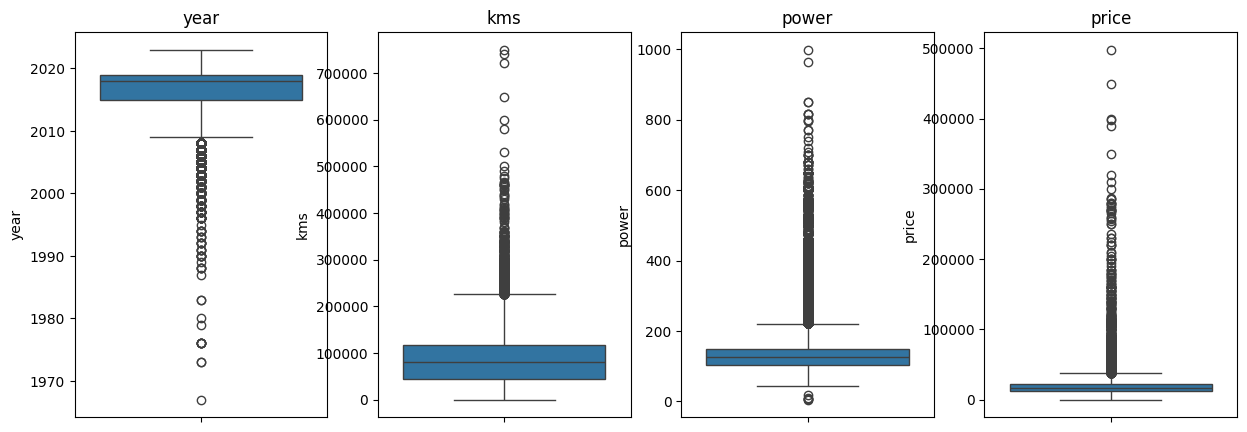

In [21]:
# Excluir la variable 'dealer_zip_code'
num_vars = df.select_dtypes(include=['float64', 'int64']).columns.drop('dealer_zip_code')

# Configurar la figura y los subplots
n_cols = 4  # Número de columnas en la cuadrícula
n_rows = 1  # Número de filas en la cuadrícula

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.boxplot(y=df[var])  # Crear el boxplot para la variable
    plt.title(var)  # Título del gráfico
    plt.xlabel('')  # Quitar etiqueta del eje x para claridad

plt.tight_layout()  # Ajustar diseño
plt.show()

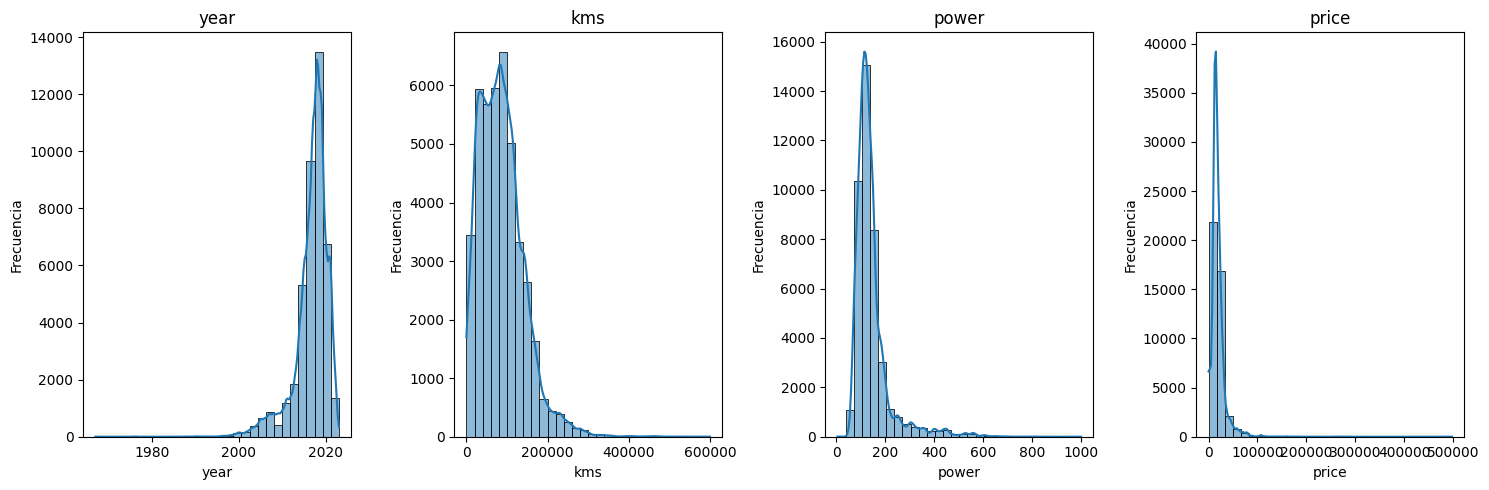

In [74]:
# Seleccionar las variables numéricas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns.drop('dealer_zip_code')

# Configurar la figura y los subplots
n_cols = 4  # Número de columnas en la cuadrícula
n_rows = 1 # Número de filas en la cuadrícula

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.histplot(df[var], kde=True, bins=30)  # Crear histograma con KDE
    plt.title(var)  # Título del gráfico
    plt.xlabel(var)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y

plt.tight_layout()  # Ajustar diseño
plt.show()

In [75]:
min_year = df['year'].min()
print(f"El valor mínimo de year en df es: {min_year}")

El valor mínimo de year en df es: 1967


Observamos que la mayoría de los coches se encuentran entre los años 2010 y superior a 2020 por poco. Encontramos algunos modelos de muchos años siendo el más antiguo de 1967.

En cuanto al precio, se puede observar que se concentran antes de los 100k euros. Podemos separar por cuartil superior en un dataframe nuevo para analizar estos vehículos aparte. 

### **1.2 - Análisis de los vehículos más costosos**

In [76]:
# Calculamos el rango intercuartílico (IQR) para la variable 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos el dataframe según los rangos definidos y lo guardamos en una nueva variable
outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]


In [77]:
#Descripción de los datos del dataframe de coches costosos
print(outliers_df.describe())
cantidad_outliers = outliers_df.shape[0]   # Número de filas en el dataframe de outliers
print(f"El número de outliers en el dataframe es: {cantidad_outliers}")

              year            kms        power          price  dealer_zip_code
count  2624.000000    2624.000000  2624.000000    2624.000000      2624.000000
mean   2018.066311   54280.343369   336.021341   62667.689024     24416.506860
std       4.448308   43056.253762   137.225723   36705.255511     14313.169108
min    1967.000000       0.000000    60.000000   38300.000000      1007.000000
25%    2017.000000   22000.000000   204.000000   43990.000000      8734.000000
50%    2019.000000   40103.000000   320.000000   51990.000000     28230.000000
75%    2021.000000   83164.250000   436.000000   67655.000000     30005.000000
max    2023.000000  250000.000000   999.000000  498000.000000     50820.000000
El número de outliers en el dataframe es: 2624


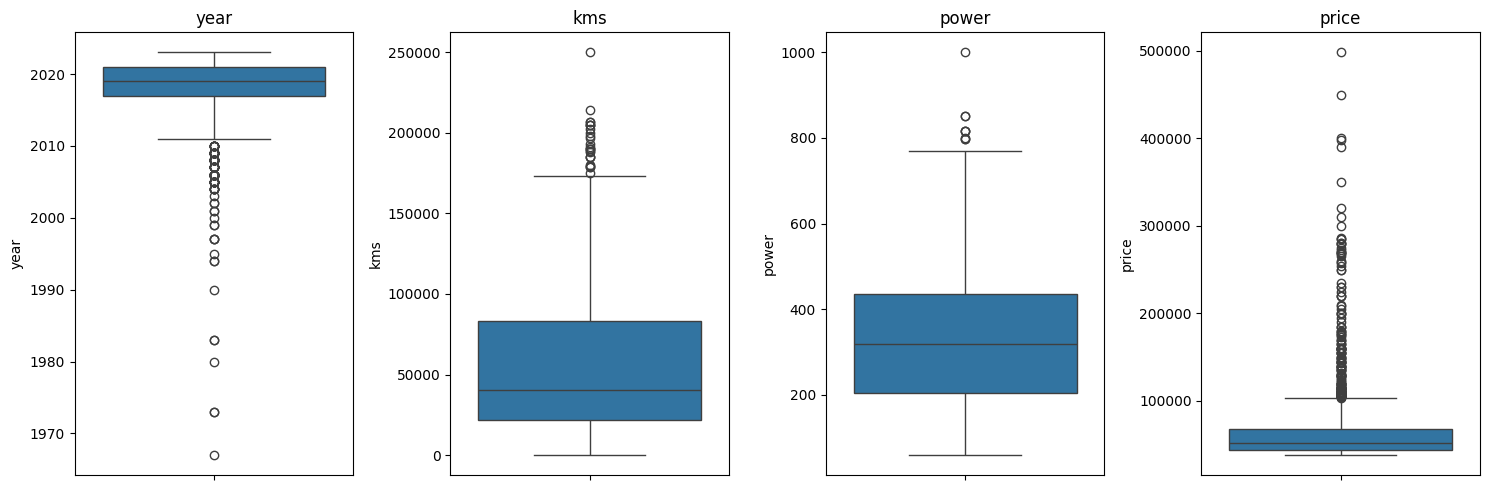

In [78]:
# Excluir la variable 'dealer_zip_code'
num_vars = outliers_df.select_dtypes(include=['float64', 'int64']).columns.drop('dealer_zip_code')

# Configurar la figura y los subplots
n_cols = 4  # Número de columnas en la cuadrícula
n_rows = 1  # Número de filas en la cuadrícula

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.boxplot(y=outliers_df[var])  # Crear el boxplot para la variable
    plt.title(var)  # Título del gráfico
    plt.xlabel('')  # Quitar etiqueta del eje x para claridad

plt.tight_layout()  # Ajustar diseño
plt.show()

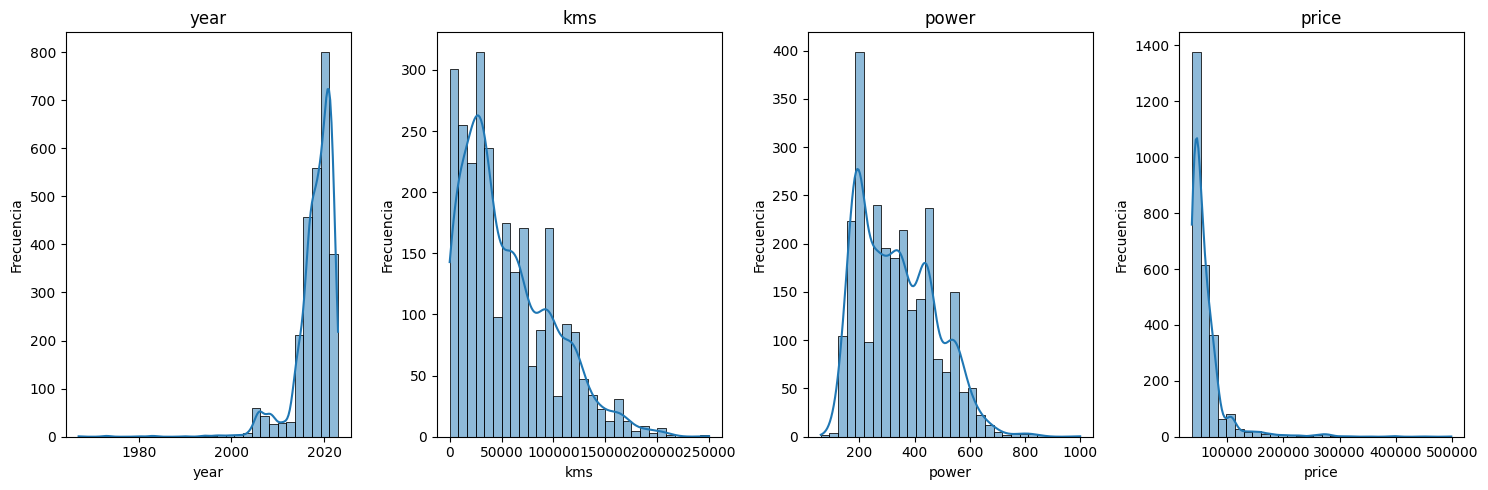

In [79]:
# Seleccionar las variables numéricas
num_vars = outliers_df.select_dtypes(include=['float64', 'int64']).columns.drop('dealer_zip_code')

# Configurar la figura y los subplots
n_cols = 4  # Número de columnas en la cuadrícula
n_rows = 1 # Número de filas en la cuadrícula

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.histplot(outliers_df[var], kde=True, bins=30)  # Crear histograma con KDE
    plt.title(var)  # Título del gráfico
    plt.xlabel(var)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y

plt.tight_layout()  # Ajustar diseño
plt.show()

Podemos observar que:
* Tenemos más cantidad de autos desde el 2010 a 2020
* El rango de potencia más frecuente es de 200 a 600 cv.
Nos indica que los vehículos de 2010 y en un rango de 200 a 600  cv son por lo general más caros.

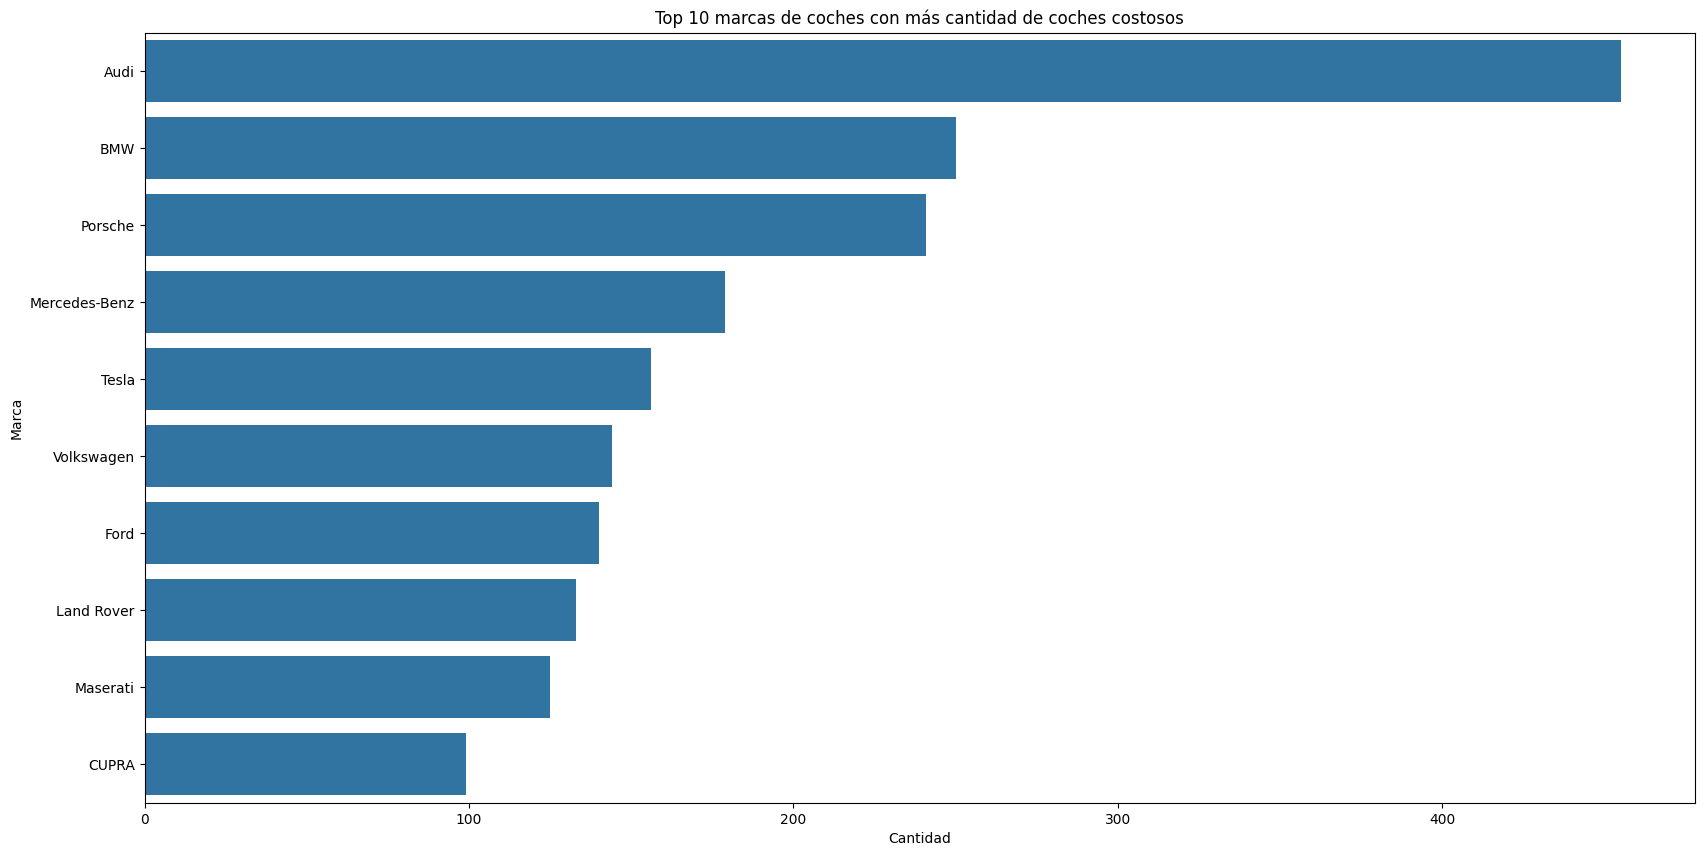

In [80]:
# Veamos las 10 marcas de coches más frecuentes en outliers_df con un gráfico de barras
plt.figure(figsize=(20, 10))  # Ajustar tamaño de la figura
top_10_makes = outliers_df['make'].value_counts().nlargest(10).index
sns.countplot(data=outliers_df[outliers_df['make'].isin(top_10_makes)], y='make', order=top_10_makes)  # Crear countplot
plt.title('Top 10 marcas de coches con más cantidad de coches costosos')  # Título del gráfico
plt.xlabel('Cantidad')  # Etiqueta del eje x
plt.ylabel('Marca')  # Etiqueta del eje y
plt.yticks(fontsize=10)  # Ajustar tamaño de la letra del eje y
plt.show()


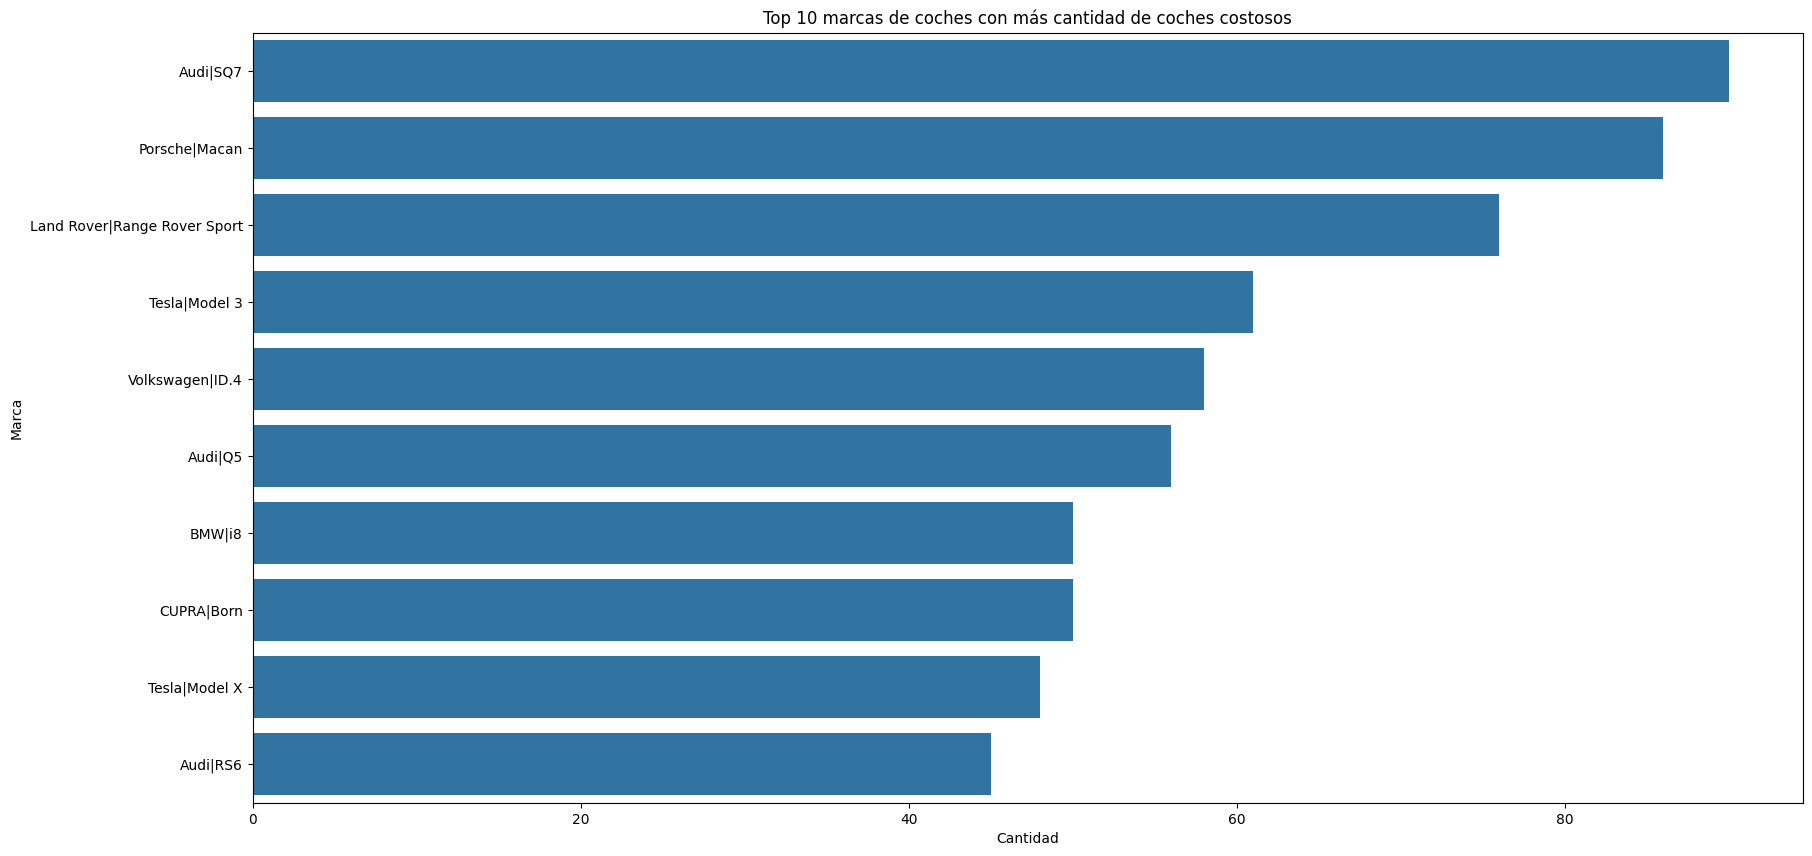

In [81]:
# Veamos los 10 modelos de coches más caros en outliers_df con un gráfico de barras
plt.figure(figsize=(20, 10))  # Ajustar tamaño de la figura
top_10_brand_models = outliers_df['brand_model'].value_counts().nlargest(10).index
sns.countplot(data=outliers_df[outliers_df['brand_model'].isin(top_10_brand_models)], y='brand_model', order=top_10_brand_models)  # Crear countplot
plt.title('Top 10 marcas de coches con más cantidad de coches costosos')  # Título del gráfico
plt.xlabel('Cantidad')  # Etiqueta del eje x
plt.ylabel('Marca')  # Etiqueta del eje y
plt.yticks(fontsize=10)  # Ajustar tamaño de la letra del eje y
plt.show()


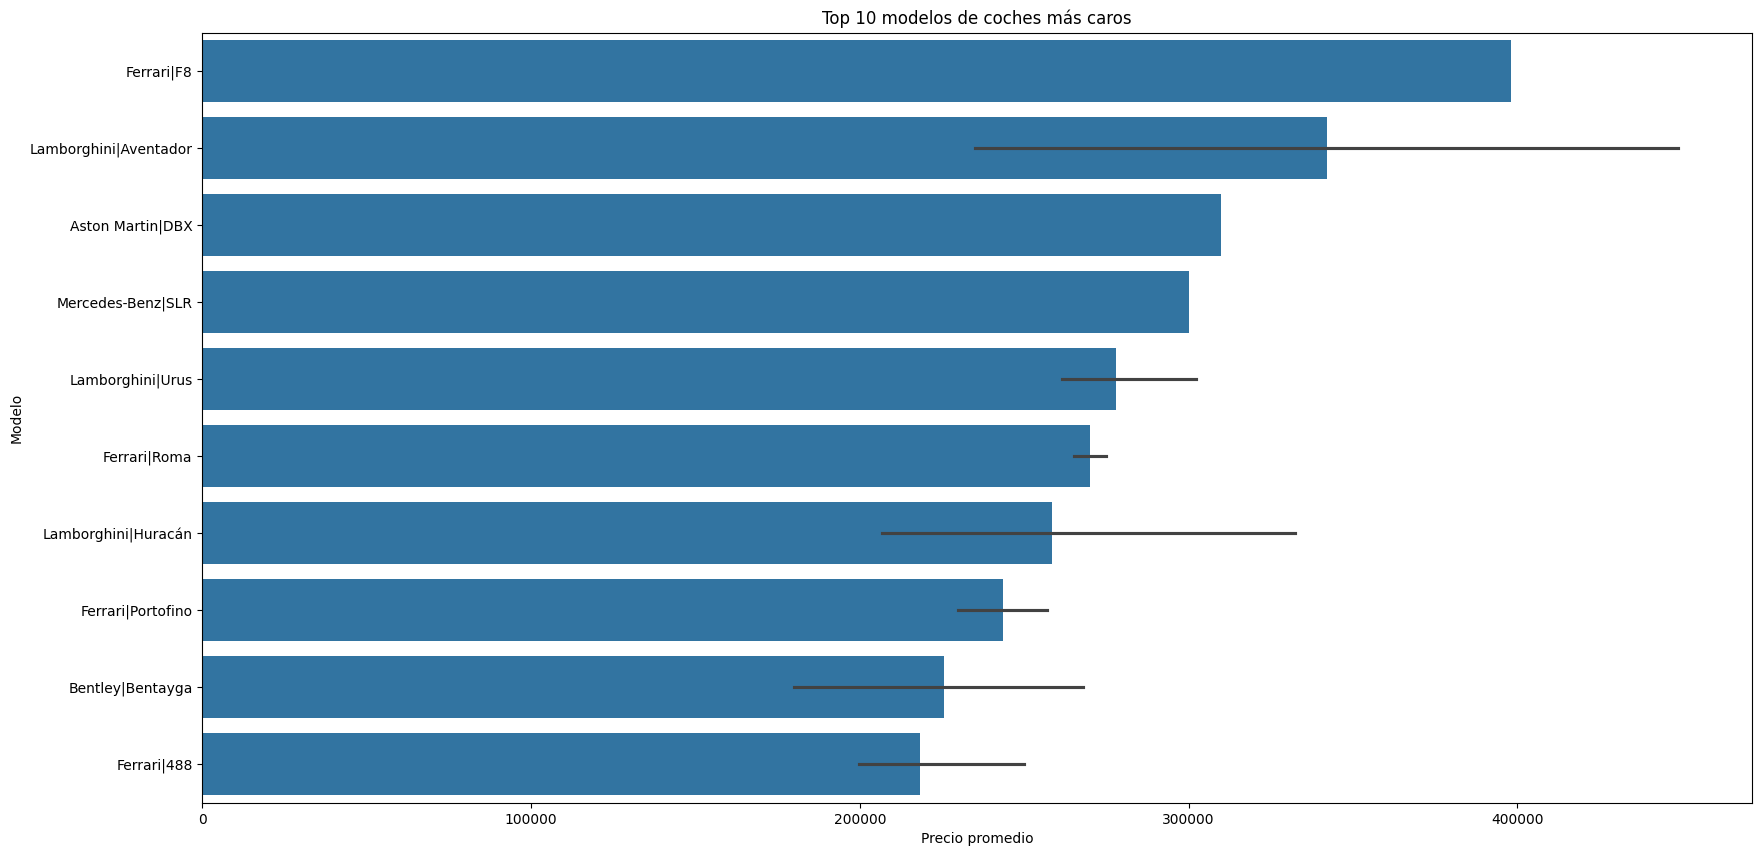

In [ ]:
# Veamos los 10 modelos de coches más caros en outliers_df con un gráfico de barras
plt.figure(figsize=(20, 10))  # Ajustar tamaño de la figura
top_10_brand_models = outliers_df.groupby('brand_model')['price'].mean().nlargest(10).index
sns.barplot(data=outliers_df[outliers_df['brand_model'].isin(top_10_brand_models)], y='brand_model', x='price', order=top_10_brand_models)  # Crear barplot
plt.title('Top 10 modelos de coches más caros')  # Título del gráfico
plt.xlabel('Precio promedio')  # Etiqueta del eje x
plt.ylabel('Modelo')  # Etiqueta del eje y
plt.yticks(fontsize=10)  # Ajustar tamaño de la letra del eje y
plt.show()

* Podemos observar que los vehículos más frecuentes dentro de la gama de coches caros son los Audi, BMW, Porsche y Mercedes.
* Los vehículos más caros como modelo individual suelen ser los superdeportivos como Ferrari o Lambhorgini


## <u>**2 - ¿Cuáles son las marcas más populares en el mercado de coches de segunda mano (según el número de anuncios)?**</u>

### Haremos un top 10

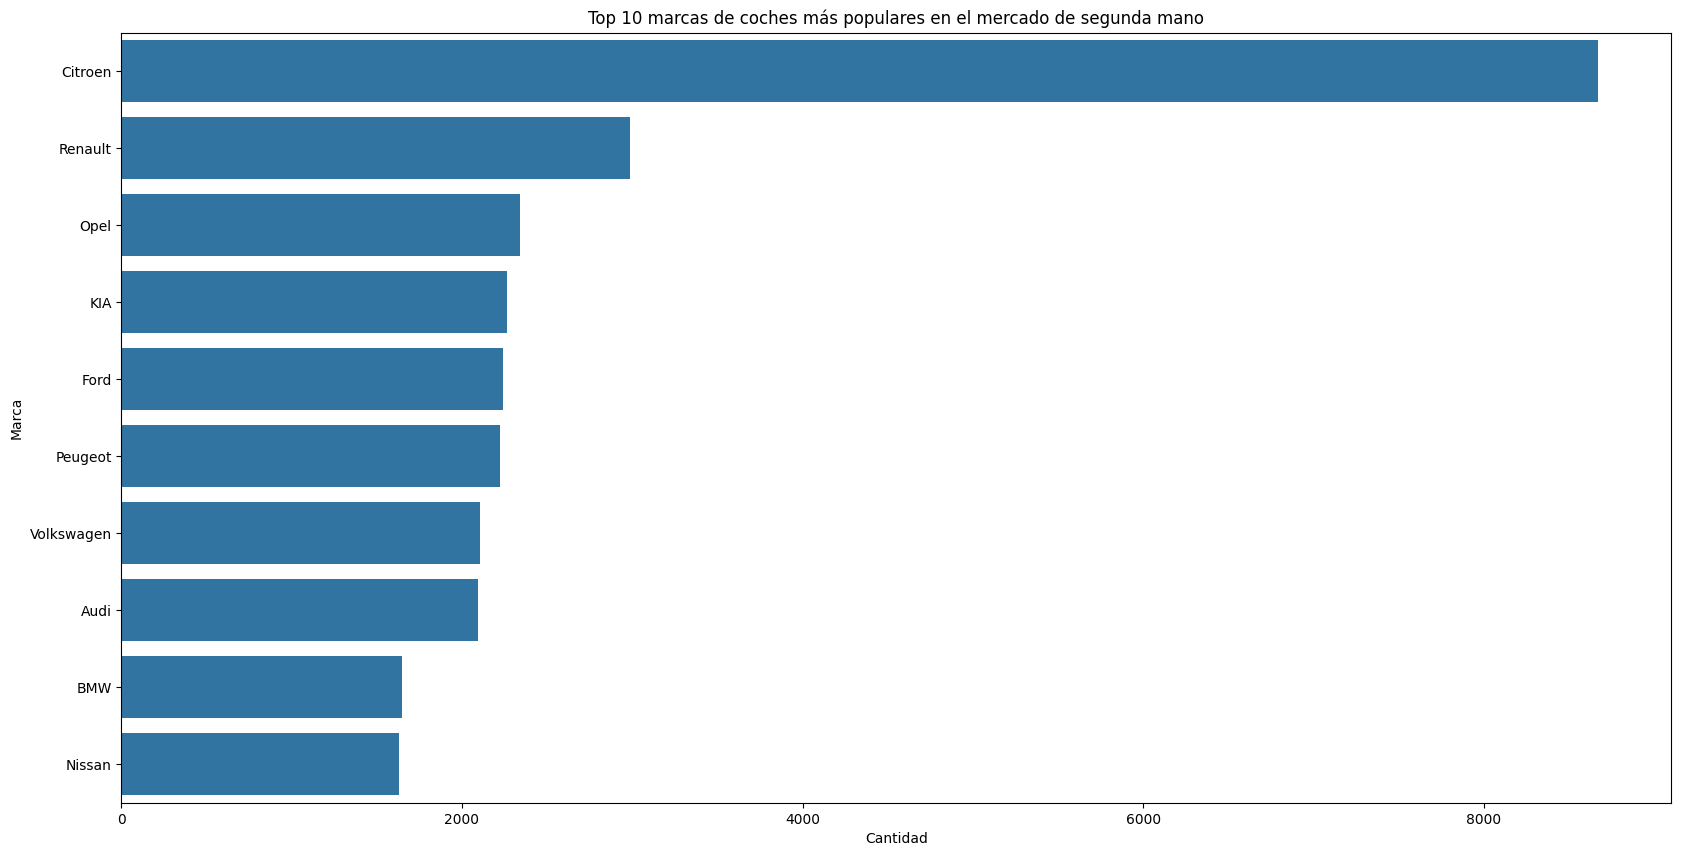

In [83]:
# Veamos las 10 marcas de coches más populares en df con un gráfico de barras
plt.figure(figsize=(20, 10))  # Ajustar tamaño de la figura
top_10_brands = df['make'].value_counts().nlargest(10).index  # Obtener las 10 marcas más populares en orden descendente
sns.countplot(data=df[df['make'].isin(top_10_brands)], y='make', order=top_10_brands)  # Crear countplot
plt.title('Top 10 marcas de coches más populares en el mercado de segunda mano')  # Título del gráfico
plt.xlabel('Cantidad')  # Etiqueta del eje x
plt.ylabel('Marca')  # Etiqueta del eje y
plt.yticks(fontsize=10)  # Ajustar tamaño de la letra del eje y
plt.show()


Vemos que la marca que más hay en diferencia a las demás es Citroen, entonces como estrategia de mercado podriamos centrarnos en no adquirir más vehículos de esta marca y Renault puesto que es indicativo de que no se vendan tanto

## <u>**3 - ¿Cómo se distribuyen los precios de venta según la marca?**</u>

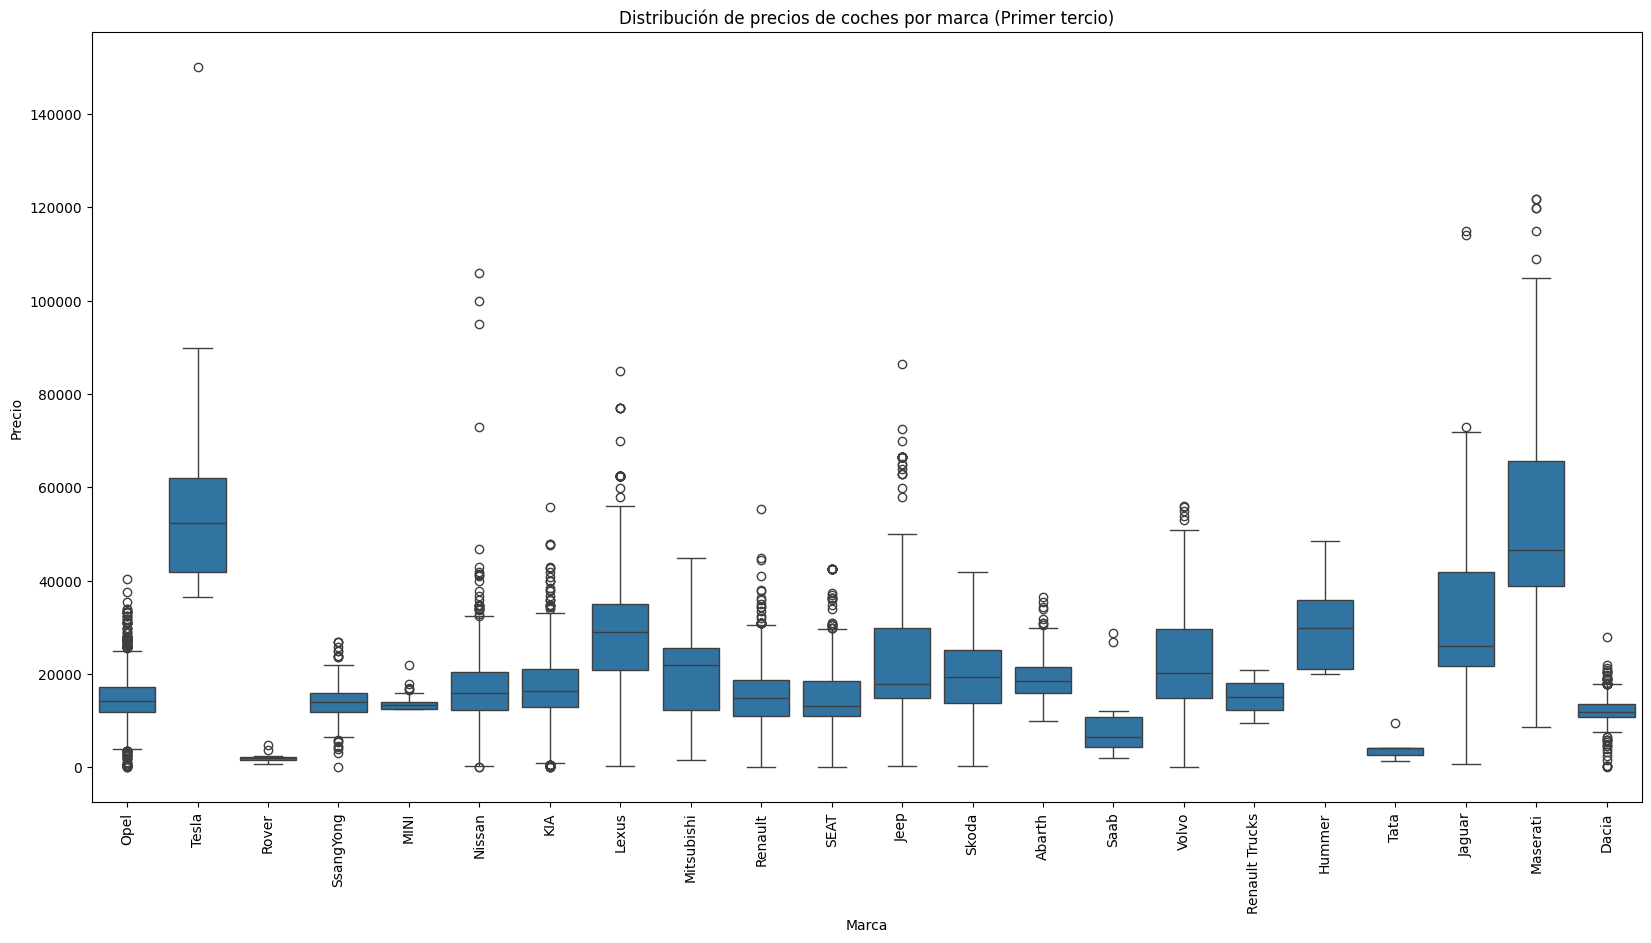

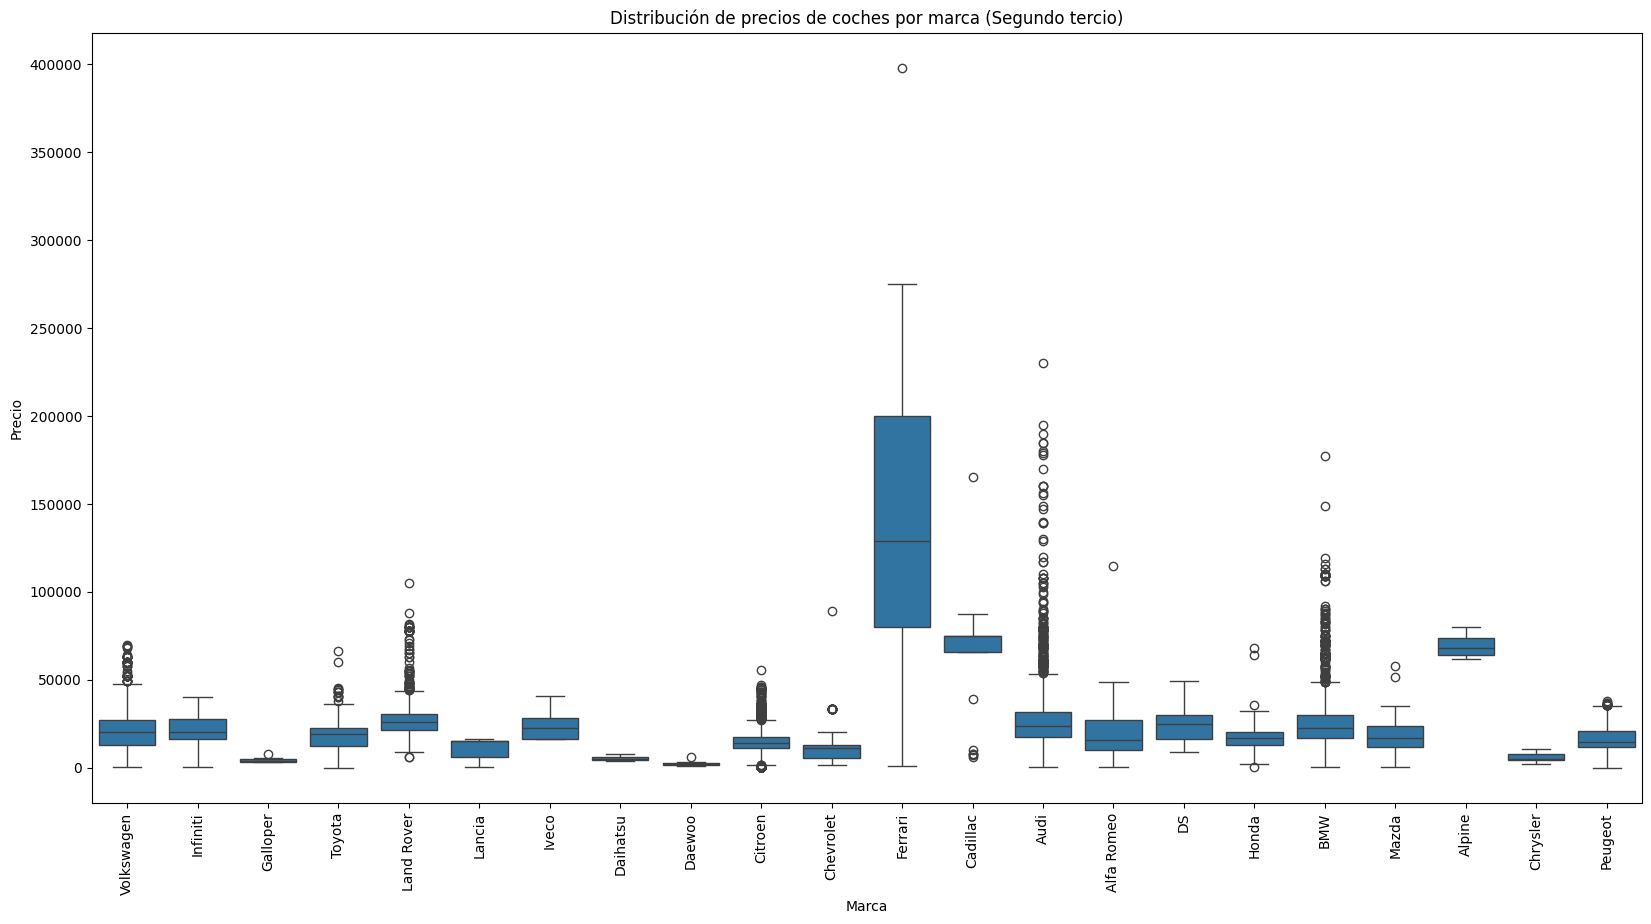

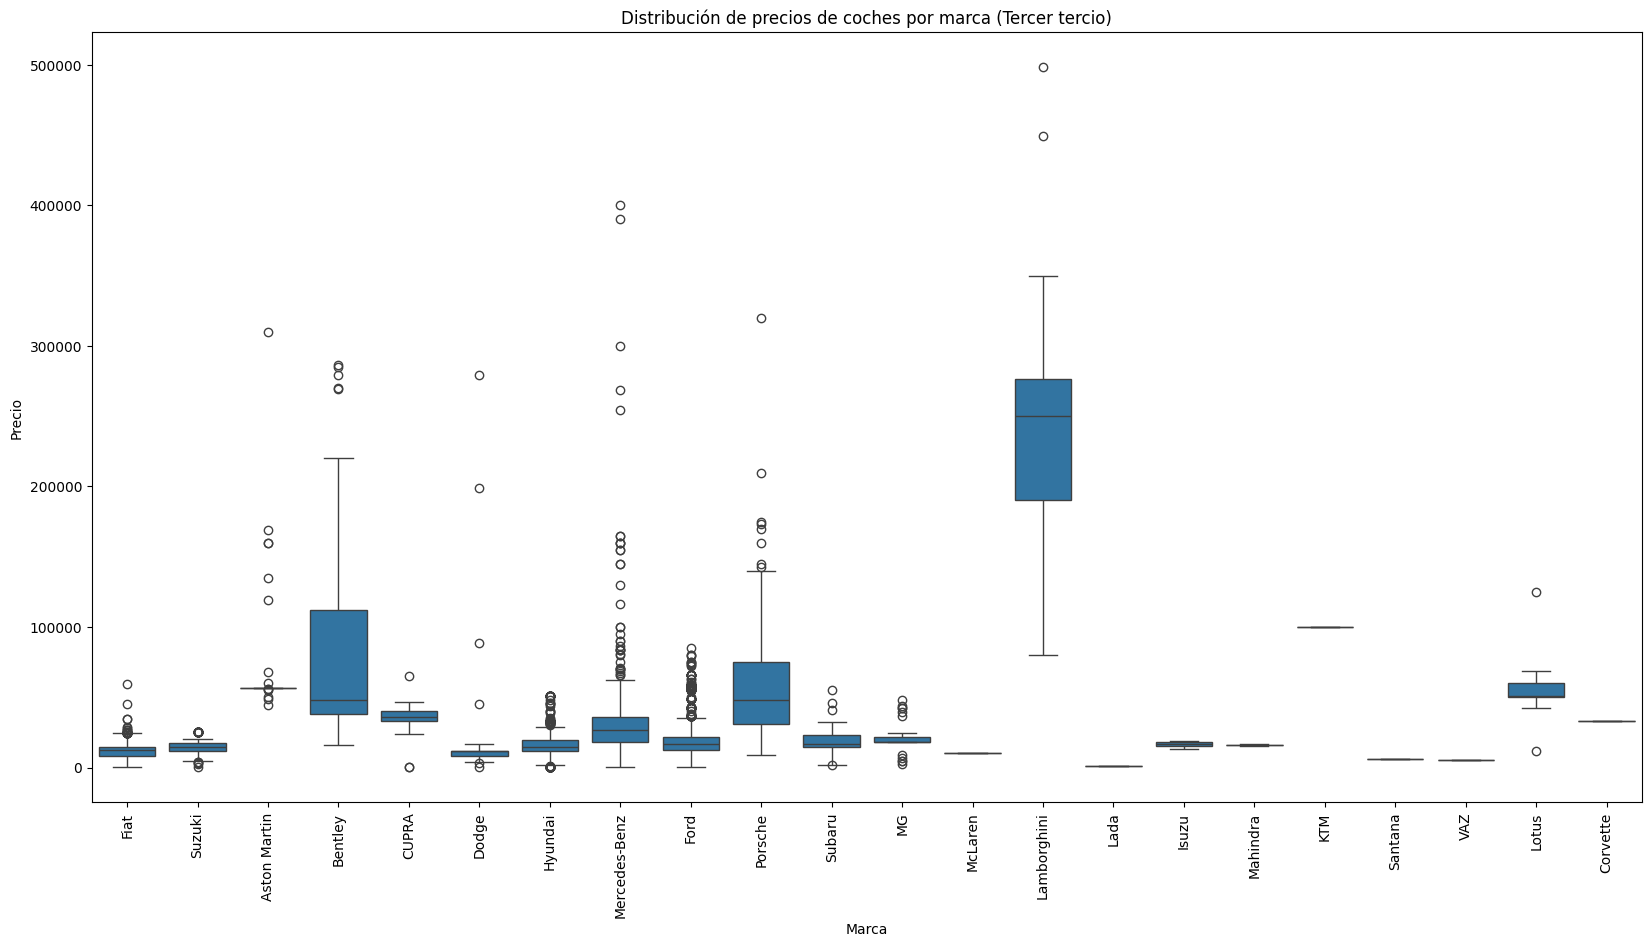

In [84]:
# Dividir las marcas en tres grupos
num_unique_makes = len(df['make'].unique())
group_size = num_unique_makes // 3
first_third_makes = df['make'].unique()[:group_size]
second_third_makes = df['make'].unique()[group_size:2*group_size]
third_third_makes = df['make'].unique()[2*group_size:]

# Primer gráfico de boxplot para el primer tercio de las marcas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['make'].isin(first_third_makes)], x='make', y='price')
plt.title('Distribución de precios de coches por marca (Primer tercio)')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

# Segundo gráfico de boxplot para el segundo tercio de las marcas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['make'].isin(second_third_makes)], x='make', y='price')
plt.title('Distribución de precios de coches por marca (Segundo tercio)')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

# Tercer gráfico de boxplot para el tercer tercio de las marcas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['make'].isin(third_third_makes)], x='make', y='price')
plt.title('Distribución de precios de coches por marca (Tercer tercio)')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

Como era de esperar, marcas como Tesla, Maserati, Ferrari, Bentley y Lamborghini son las que tienen por lo general los precios más elevados. Notese que Audi, Mercedes-Benz y BMW tienen vehículos en un rango de precio muy elevado también como podemos ver en sus outliers, sin embargo también tenemos coches más económicos.

Entre las marcas más económicas podemos encontrar Galloper, Lancia, Daihatsu, Daewoo, Chrysler, FIAT, Suzuki, Subaru, MG, McLaren (?).

Si queremos atraer a clientes con alto poder adquisitivo nos podríamos centrar en adquirir las marcas con los precios más elevados mientras que si queremos atraer a un poder-adquisitivo bajo nos podríamos centrar más en las segundas.

In [85]:
df.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'brand_model'],
      dtype='object')

## <u>**4 - ¿Cuál es la relación entre el año de fabricación y el precio?**</u>

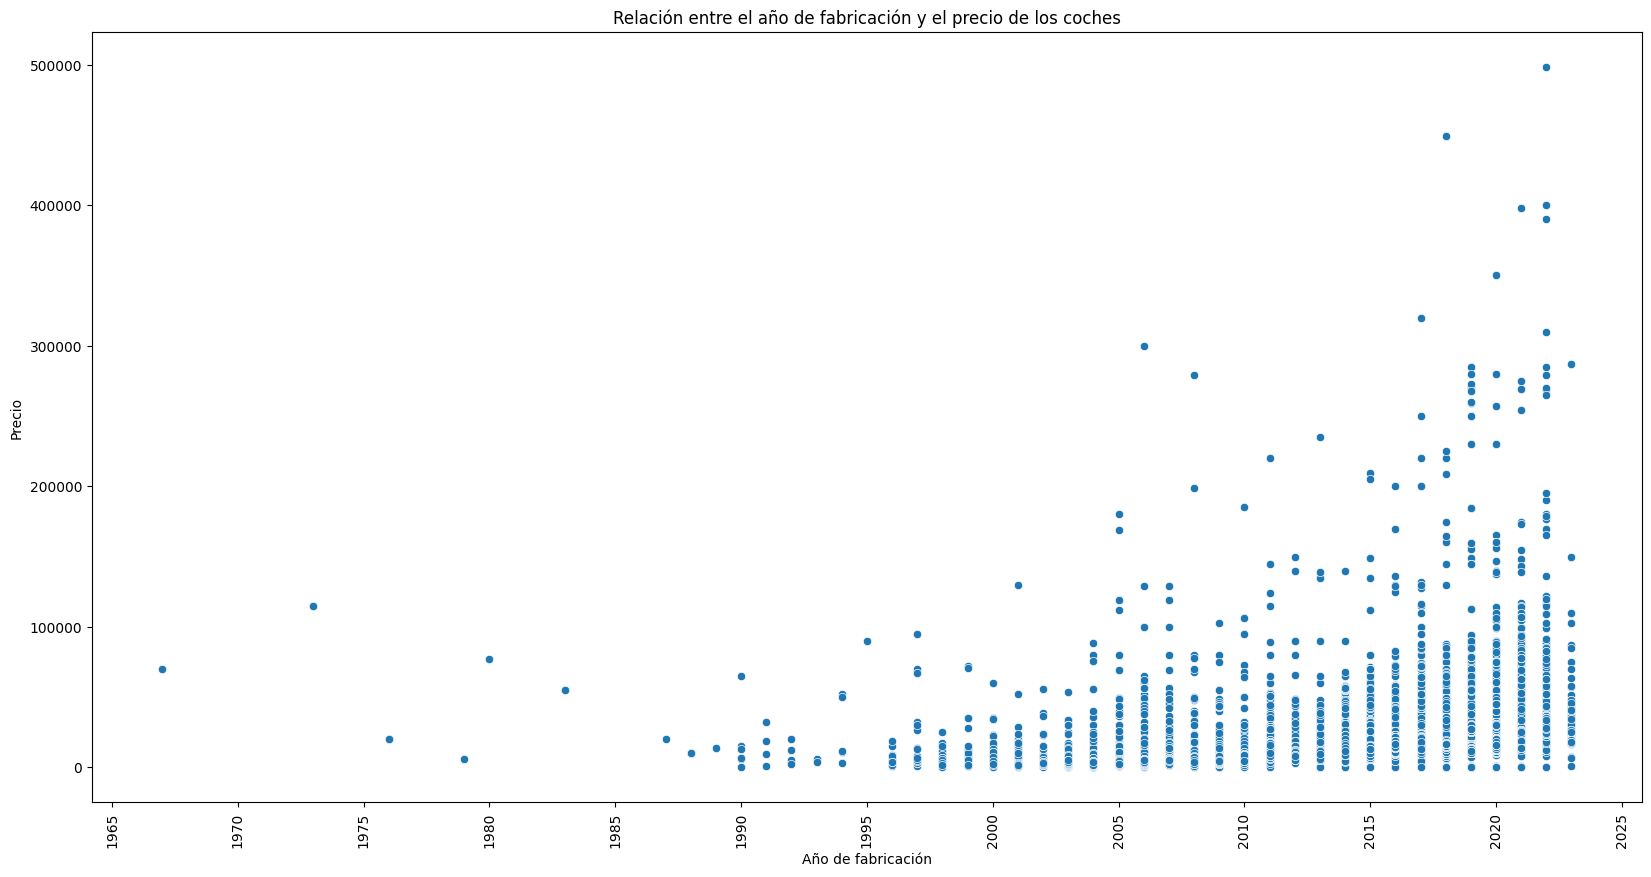

In [86]:


# Convertir la columna 'year' a formato datetime
df['year_formato_fecha'] = pd.to_datetime(df['year'], format='%Y')


# Crear el diagrama de dispersión
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='year_formato_fecha', y='price')
plt.title('Relación entre el año de fabricación y el precio de los coches')
plt.xlabel('Año de fabricación')
plt.ylabel('Precio')
plt.xticks(rotation=90)

# Ajustar los ticks del eje X para mostrar más años
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Mostrar cada 5 años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()


Si que se observa una tendencia creciente entre el año de fabricación y el precio, esto nos ayudaría a ajustar el precio de los coches según la competencia

## <u>**5 - ¿Cómo afecta el kilometraje (kms) al precio de los vehículos?**</u>

C:\Users\spide\AppData\Local\Temp\ipykernel_15212\1503145283.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



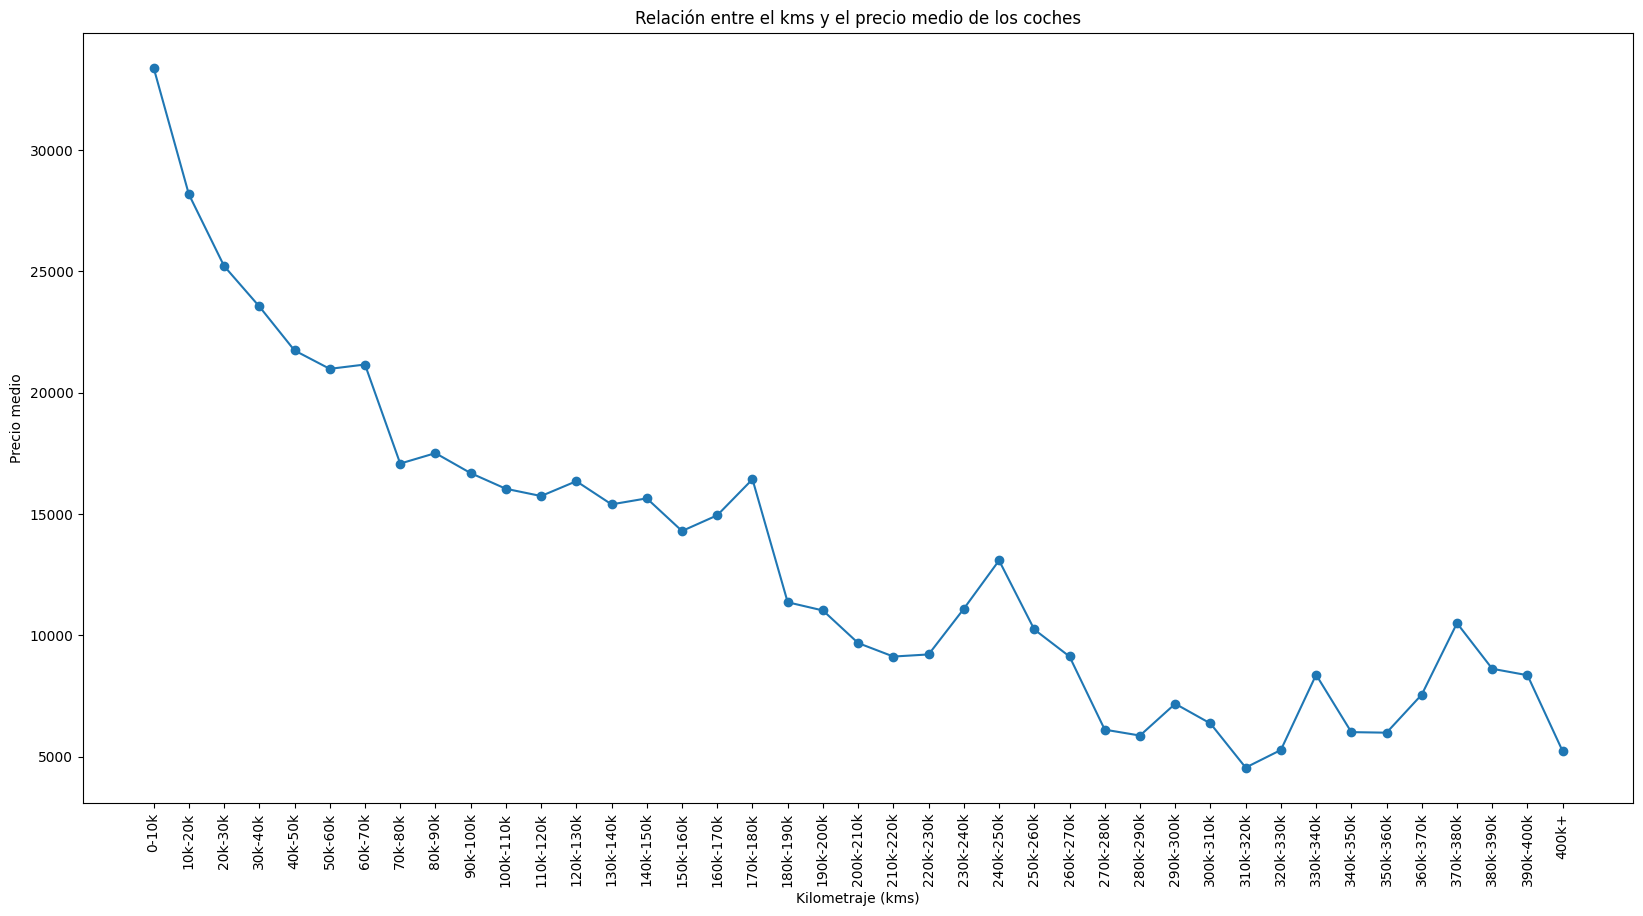

In [143]:
#Creamos una columna de clasificación para el kilometraje (kms)
df['kms_classification'] = pd.cut(df['kms'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000, np.inf], labels=['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-110k', '110k-120k', '120k-130k', '130k-140k', '140k-150k', '150k-160k', '160k-170k', '170k-180k', '180k-190k', '190k-200k', '200k-210k', '210k-220k', '220k-230k', '230k-240k', '240k-250k', '250k-260k', '260k-270k', '270k-280k', '280k-290k', '290k-300k', '300k-310k', '310k-320k', '320k-330k', '330k-340k', '340k-350k', '350k-360k', '360k-370k', '370k-380k', '380k-390k', '390k-400k', '400k+'])

# Crear el gráfico de líneas con la media de precio
plt.figure(figsize=(20, 10))
mean_price_by_kms = df.groupby('kms_classification')['price'].mean()
mean_price_by_kms.plot(kind='line', marker='o')
plt.title('Relación entre el kms y el precio medio de los coches')
plt.xlabel('Kilometraje (kms)')
plt.ylabel('Precio medio')
plt.xticks(rotation=90)
plt.xticks(ticks=range(len(mean_price_by_kms.index)), labels=mean_price_by_kms.index)

plt.show()


Como es bien sabido, a más kms tiene el coche menor es su precio. Sin embargo podemos que entre 50-60k , 70-150k los precios no varían mucho.

De 50k a 60k kms vemos un punto de inflexión en el que los coches bajan su precio promedio

Observamos también picos crecientes en vehículos de 170-180k y 240-250k si echamos un vistazo a que coches se encuentran en esos rangos:

         make       model  year       kms  price
380       KIA     Sorento  2007  175000.0   6990
525    Nissan     Primera  2005  170000.0   2800
546    Nissan       NV400  2018  174500.0  18995
659    Nissan  Terrano II  1999  172605.0   5999
748   Renault      Kangoo  2016  173804.0   8750
1011     Opel      Antara  2007  178790.0   7800
1045  Renault     Fluence  2014  170000.0   7900
1049  Renault       Modus  2005  172039.0   3499
1141    Skoda     Octavia  2002  179029.0   2190
1148    Skoda     Octavia  2007  170000.0   7990
            make       model  year       kms  price
359          KIA      Carens  2008  240000.0   3490
523   Mitsubishi       L 200  2009  249000.0  11499
605       Nissan     X-Trail  2016  246000.0  12990
1454       Volvo        XC70  2016  250000.0  15900
2100   Chevrolet     Lacetti  2007  245000.0   1990
2114        Audi  A6 Allroad  2015  246682.0  23408
2115        Audi  A6 Allroad  2015  246682.0  23408
2116        Audi  A6 Allroad  2015  246682.0 

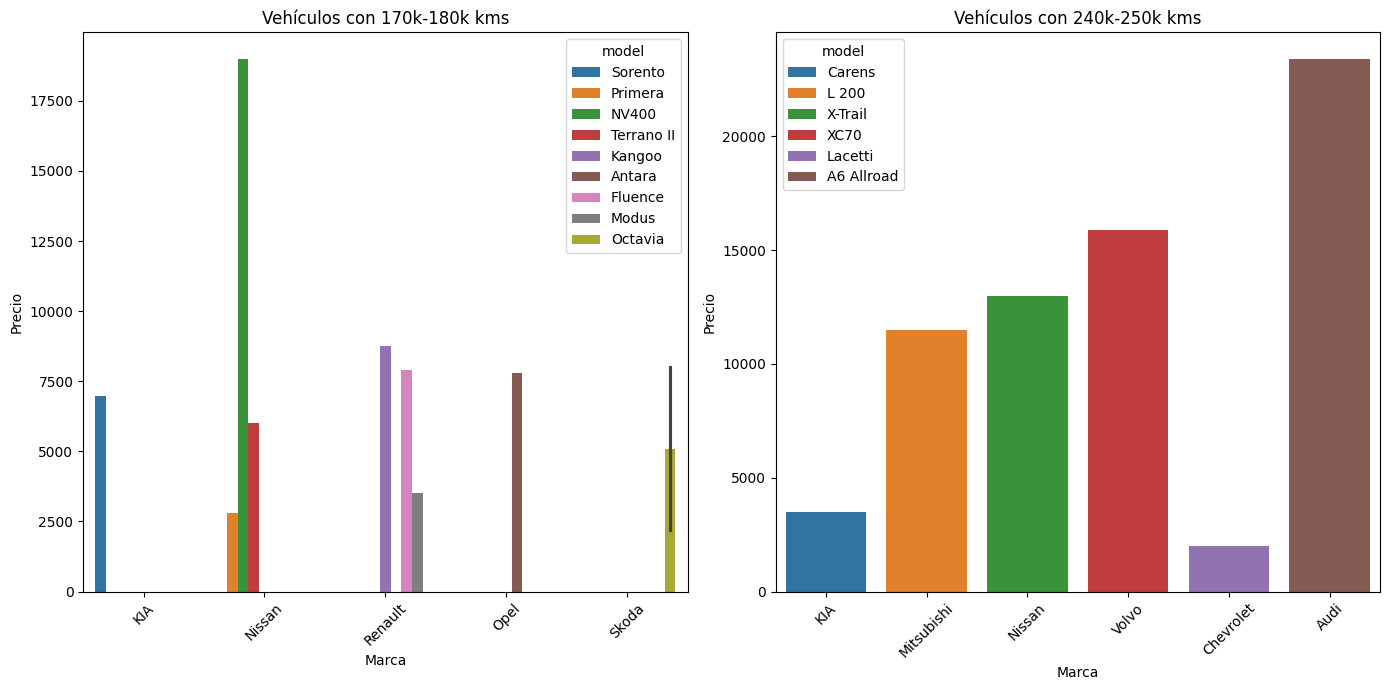

In [91]:
#Mostramos la marca, modelo y año de los vehículos ne un rango de kilometraje de 170-180k y 240-250k
rango_1 = df[(df['kms'] >= 170000) & (df['kms'] <= 180000)][['make', 'model', 'year', 'kms','price']].head(10)
rango_2 = df[(df['kms'] >= 240000) & (df['kms'] <= 250000)][['make', 'model', 'year', 'kms','price']].head(10)
print(rango_1)
print(rango_2)
# Graficar los datos de los dos rangos de kilometraje
plt.figure(figsize=(14, 7))

# Primer rango
plt.subplot(1, 2, 1)
sns.barplot(data=rango_1, x='make', y='price', hue='model')
plt.title('Vehículos con 170k-180k kms')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=45)

# Segundo rango
plt.subplot(1, 2, 2)
sns.barplot(data=rango_2, x='make', y='price', hue='model')
plt.title('Vehículos con 240k-250k kms')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [92]:
# Contar la cantidad de Nissan NV400 en df
nissan_nv400_count = df[(df['make'] == 'Nissan') & (df['model'] == 'NV400')].shape[0]

# Contar la cantidad de Audi A6 Allroad en df
audi_a6_allroad_count = df[(df['make'] == 'Audi') & (df['model'] == 'A6 Allroad')].shape[0]

print(f"Cantidad de Nissan NV400 en df: {nissan_nv400_count}")
print(f"Cantidad de Audi A6 Allroad en df: {audi_a6_allroad_count}")

Cantidad de Nissan NV400 en df: 46
Cantidad de Audi A6 Allroad en df: 35


En estos dos caso tenemos el nissan NV400 que se trata de una furgoneta y el audi A6 Allroad. Por lo que estos dos vehículos por lo general se venden bien pese a su alto kilometraje y podríamos ajustar los precios de estos modelos en altos kilometrajes para hacerlos más atractivos a los clientes y diferenciarnos de la competencia. 

## <u>**6 - ¿Cuál es la distribución de tipos de combustible y cómo varía el precio en cada tipo?**</u>

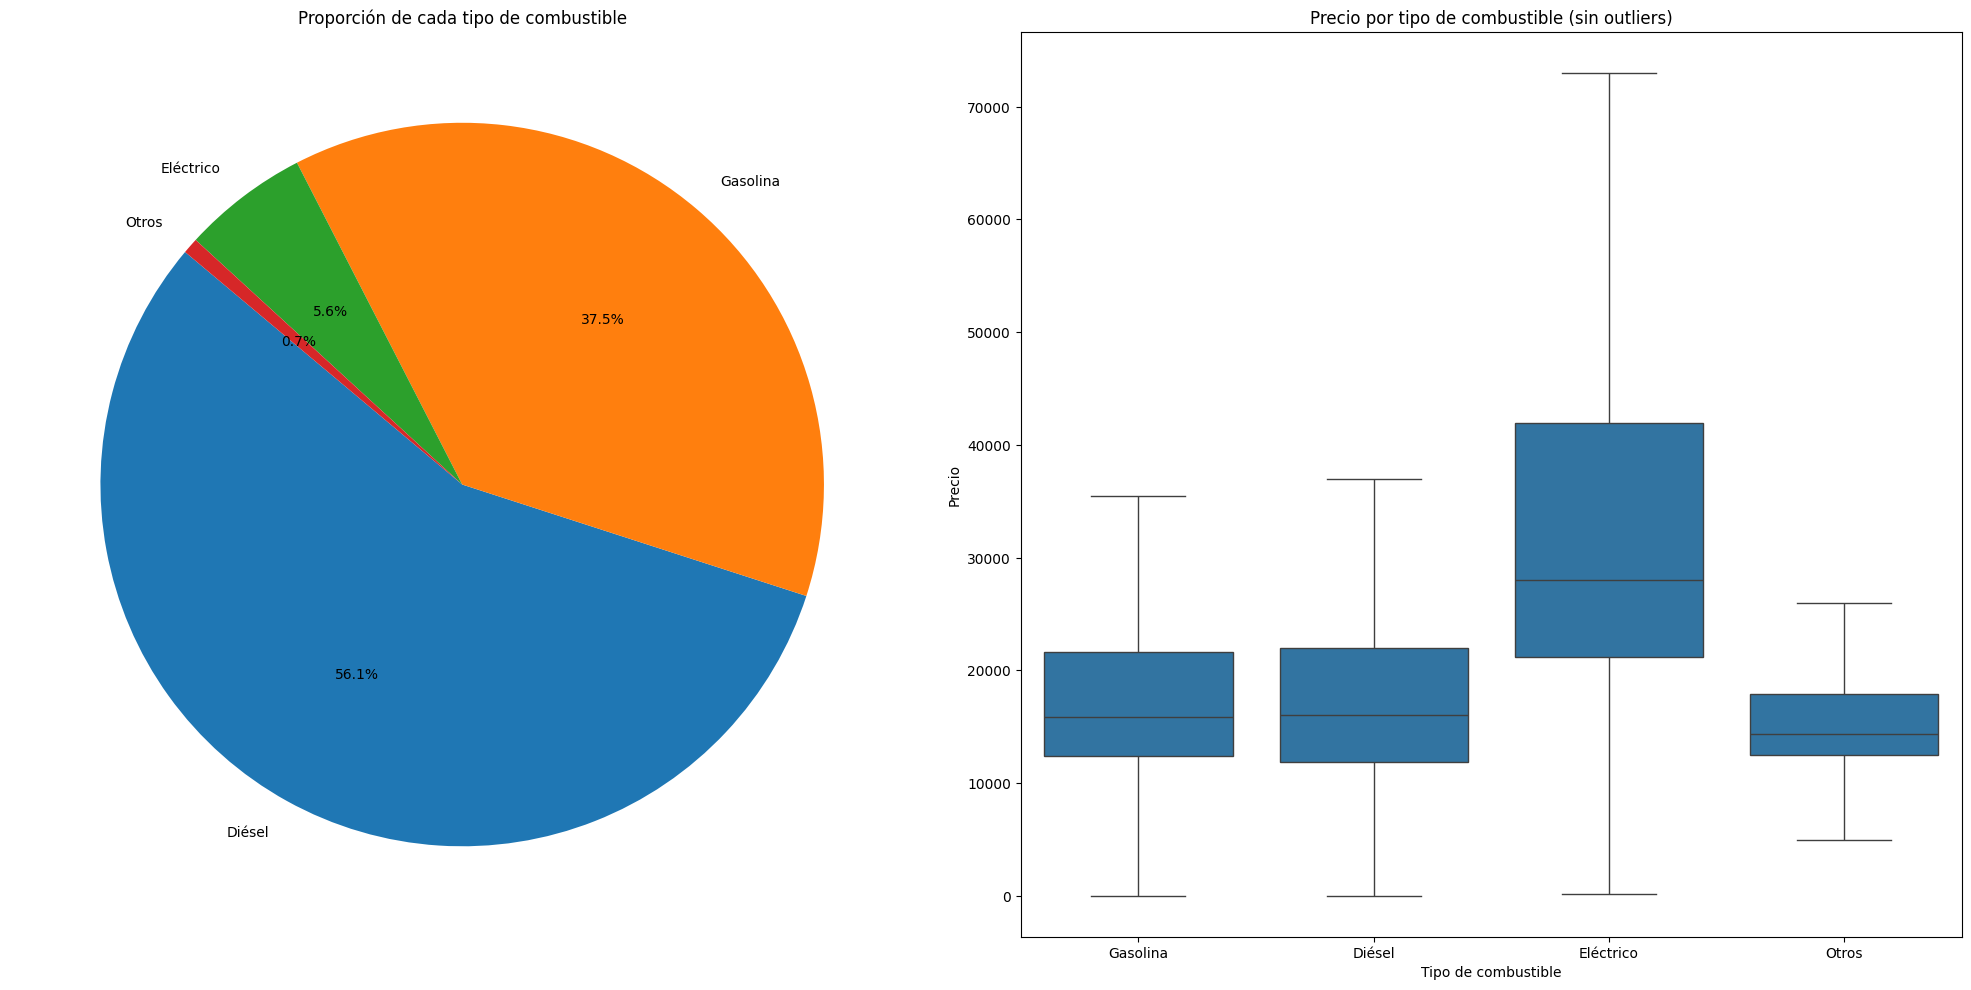

In [145]:
# Configurar la figura y los subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico de pastel para la proporción de cada tipo de combustible
fuel_counts = df['fuel'].value_counts(normalize=True)
ax[0].pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Proporción de cada tipo de combustible')

# Boxplot para mostrar el precio por tipo de combustible sin outliers
sns.boxplot(x='fuel', y='price', data=df, ax=ax[1],showfliers=False)
ax[1].set_title('Precio por tipo de combustible (sin outliers)')
ax[1].set_xlabel('Tipo de combustible')
ax[1].set_ylabel('Precio')


plt.tight_layout()
plt.show()

Observamos que los los coches diesel dominan el mercado seguidos de los de gasolina presentando una distribución de precios similar. Sin embargo encontramos una casos de precio mayor en gasolina, siendo que los vehículos más caros los hacen de este tipo. Sin tener en cuenta los outliers se puede visualizar que los vehículos eléctricos suelen ser mas caros y otros como vehículos de gas o híbridos presentan un precio menor. Se podrían favorecer en promociones para vehículos diesel ya que el mercado presenta gran cantidad de estos, indicativo de que el diesel se va a dejar de fabricar debido a las altas emisiones contaminantes.

## <u>**7 - ¿Cómo varía la potencia (CV) de los vehículos en el inventario y qué influencia tiene en el precio?**</u>

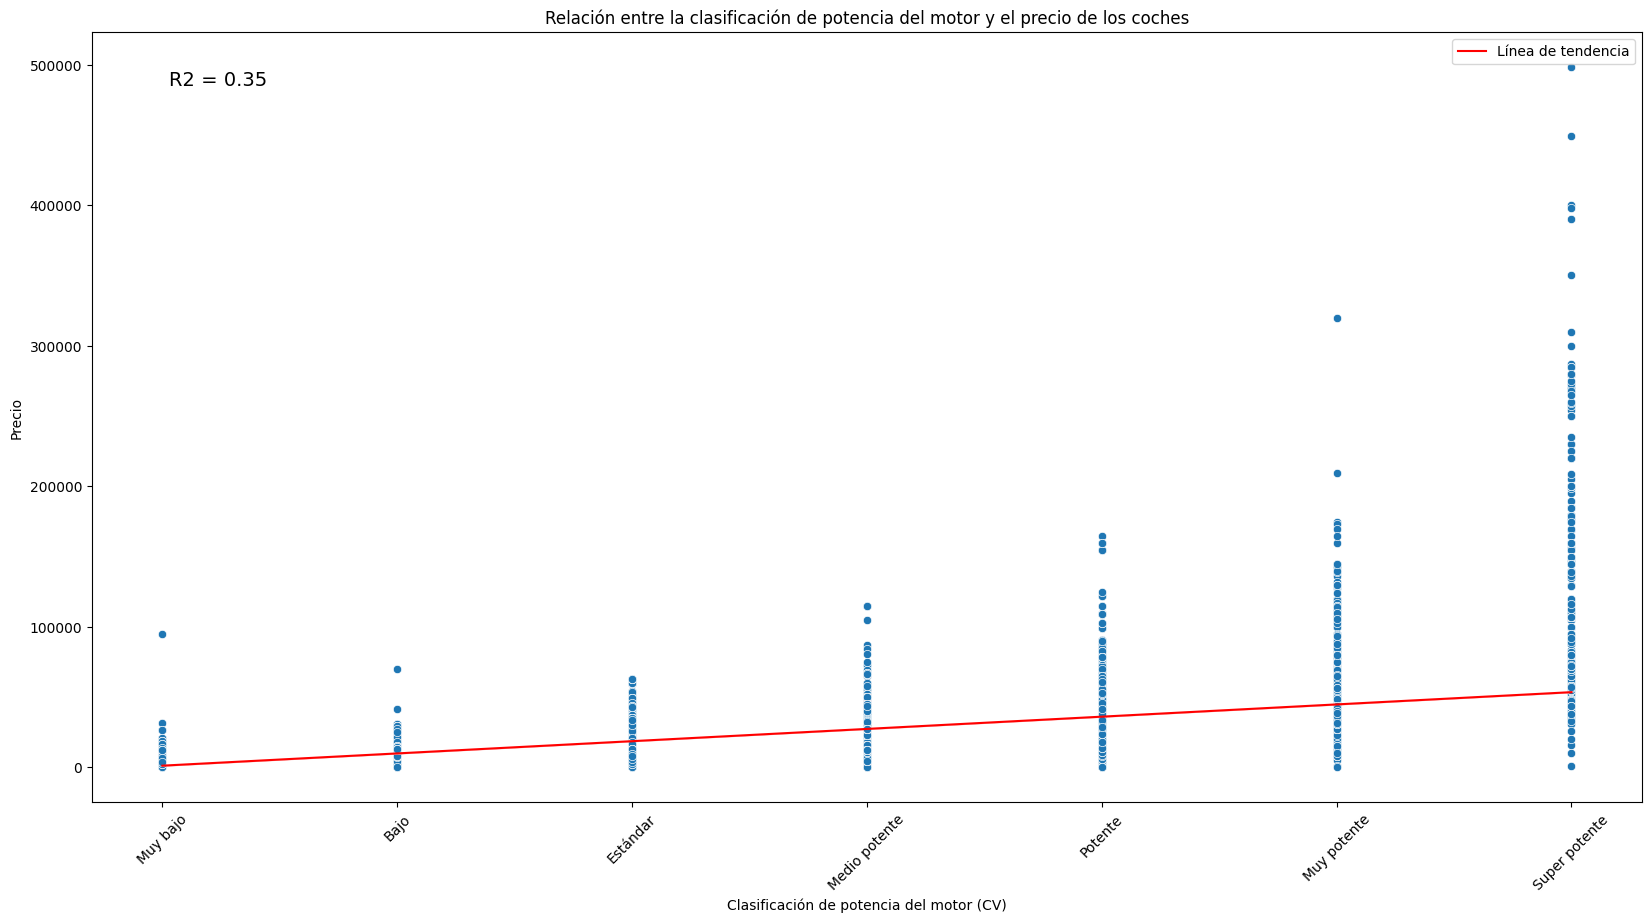

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear una clasificación para la potencia del motor
df['power_classification'] = pd.cut(df['power'], bins=[0, 80, 100, 150, 200, 350, 500, np.inf], labels=['Muy bajo', 'Bajo', 'Estándar', 'Medio potente', 'Potente', 'Muy potente', 'Super potente'])

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='power_classification', y='price')
plt.title('Relación entre la clasificación de potencia del motor y el precio de los coches')
plt.xlabel('Clasificación de potencia del motor (CV)')
plt.ylabel('Precio')
plt.xticks(rotation=45)

# Añadir línea de tendencia

# Convertir las categorías a números para la regresión lineal
df['power_classification_num'] = df['power_classification'].cat.codes

# Ajustar el modelo de regresión lineal
X = df[['power_classification_num']]
y = df['price']
model = LinearRegression().fit(X, y)
df['trend'] = model.predict(X)

# Graficar la línea de tendencia
sns.lineplot(data=df, x='power_classification', y='trend', color='red', label='Línea de tendencia')

# Calcular y mostrar el valor de R2
r2 = r2_score(y, df['trend'])
plt.text(0.05, 0.95, f'R2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.show()

Existe una correlación positiva entre la potencia de motor y el precio. Podemos buscar modelos en los que la relación potencia-motor sea la más económica

In [146]:

# Obtener los 20 brand_model con la media de coste_por_unidad_de_potencia más baja para cada clasificación de potencia
top_20_medio_potente = medio_potente.groupby('brand_model')['coste_por_unidad_de_potencia'].mean().nsmallest(20).reset_index()
top_20_potente = potente.groupby('brand_model')['coste_por_unidad_de_potencia'].mean().nsmallest(20).reset_index()
top_20_muy_potente = muy_potente.groupby('brand_model')['coste_por_unidad_de_potencia'].mean().nsmallest(20).reset_index()

# Crear gráficos de barras para cada clasificación de potencia
fig_medio_potente = px.bar(top_20_medio_potente, 
                           x='brand_model', 
                           y='coste_por_unidad_de_potencia', 
                           title='Top 20 Mejores Resultados de Coste por Unidad de Potencia (Medio potente)',
                           labels={'brand_model': 'Marca y Modelo', 'coste_por_unidad_de_potencia': 'Coste por Unidad de Potencia'})

fig_potente = px.bar(top_20_potente, 
                     x='brand_model', 
                     y='coste_por_unidad_de_potencia', 
                     title='Top 20 Mejores Resultados de Coste por Unidad de Potencia (Potente)',
                     labels={'brand_model': 'Marca y Modelo', 'coste_por_unidad_de_potencia': 'Coste por Unidad de Potencia'})

fig_muy_potente = px.bar(top_20_muy_potente, 
                         x='brand_model', 
                         y='coste_por_unidad_de_potencia', 
                         title='Top 20 Mejores Resultados de Coste por Unidad de Potencia (Muy potente)',
                         labels={'brand_model': 'Marca y Modelo', 'coste_por_unidad_de_potencia': 'Coste por Unidad de Potencia'})

fig_medio_potente.show()
fig_potente.show()
fig_muy_potente.show()

In [148]:
df[(df['make']=='Audi') & (df['model']=='S8')][['price', 'power']]

,price,power
2296,21990,450.0
3045,5299,360.0
3565,51000,680.0
3566,49900,680.0
4346,30900,520.0
4347,51000,680.0
4348,49900,680.0
4349,51000,680.0
4350,49900,680.0
8996,44990,520.0


## <u>**8 - ¿Existen diferencias de precio según el tipo de cambio de marcha (manual vs. automático)?**</u>

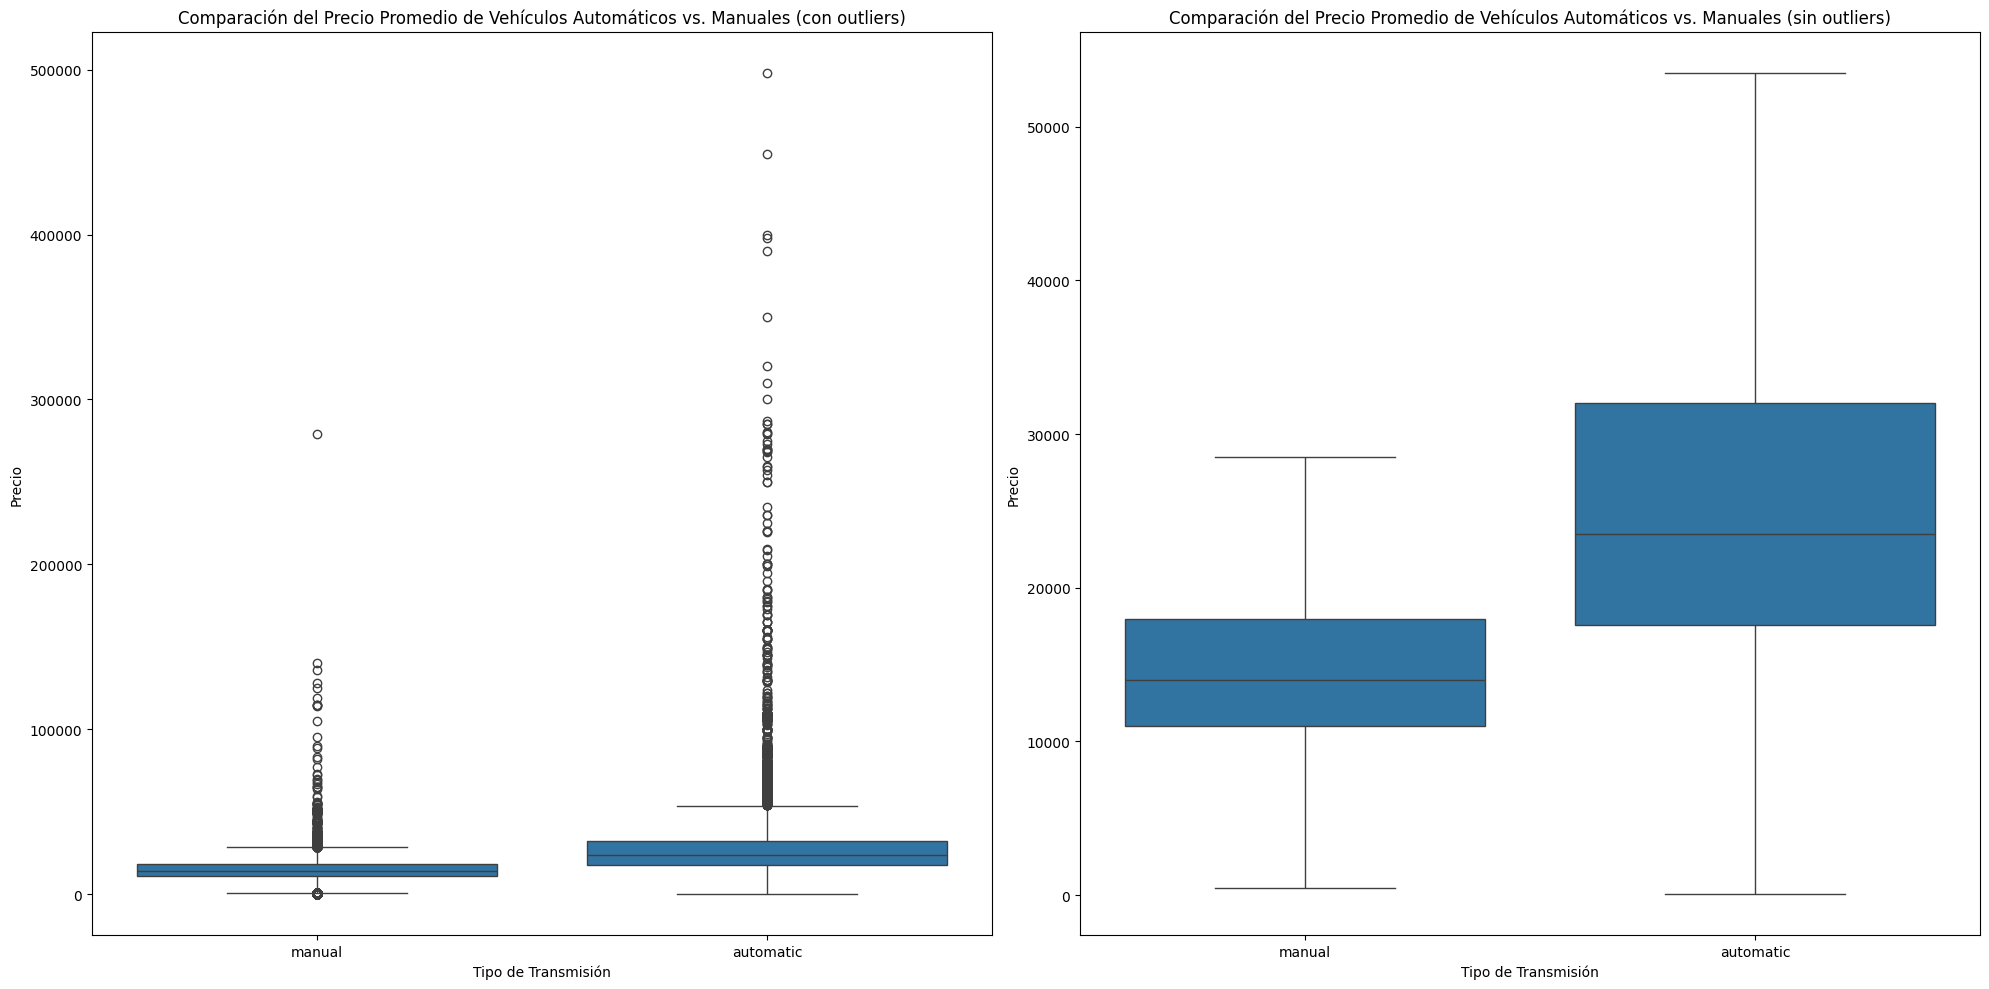

In [128]:
# Crear subplots de una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Boxplot con outliers
sns.boxplot(x='shift', y='price', data=df, ax=axes[0], showfliers=True)
axes[0].set_title('Comparación del Precio Promedio de Vehículos Automáticos vs. Manuales (con outliers)')
axes[0].set_xlabel('Tipo de Transmisión')
axes[0].set_ylabel('Precio')

# Boxplot sin outliers
sns.boxplot(x='shift', y='price', data=df, ax=axes[1], showfliers=False)
axes[1].set_title('Comparación del Precio Promedio de Vehículos Automáticos vs. Manuales (sin outliers)')
axes[1].set_xlabel('Tipo de Transmisión')
axes[1].set_ylabel('Precio')

plt.tight_layout()
plt.show()

A priori parece que los vehículos automáticos son más caros que los manuales, para confirmarlo matemáticamente realizaremos pruebas estadísticaas para confirmar 

In [129]:
def diagrama_flujo_test_hipótesis_Anderson_Darling(conjunto1, conjunto2, alpha=0.05):
    '''En primer lugar se realiza una prueba de Anderson-Darling para determinar si los datos siguen una distribución normal
    Librerías necesarias: '''
    from scipy.stats import anderson

    '''OJO: La prueba de Anderson-Darling en esta función espera una lista o un array unidimensional, no funcionará con un DataFrame
    o una Serie de pandas, por lo que es necesario pasar los datos como una lista o un array.
    '''
    #Convertir los conjuntos a arrays unidimensionales si son DataFrames o Series
    if isinstance(conjunto1, pd.DataFrame) or isinstance(conjunto1, pd.Series):
        conjunto1 = conjunto1.values.flatten()
    if isinstance(conjunto2, pd.DataFrame) or isinstance(conjunto2, pd.Series):
        conjunto2 = conjunto2.values.flatten()
        
    # Se realiza la prueba de Anderson-Darling
    stat_1, crit_1, sig_1 = anderson(conjunto1)
    stat_2, crit_2, sig_2 = anderson(conjunto2)
    print(f"El valor estadístico para el conjunto 1 es: {stat_1} y para el conjunto 2 es: {stat_2}")
    
    if stat_1 < crit_1[2] and stat_2 < crit_2[2]:  # Usamos el valor crítico para el 5% de significancia
        '''La lista de valores críticos (crit_price y crit_reviews) contiene los valores críticos para diferentes niveles de significancia 
        (15%, 10%, 5%, 2.5%, y 1%).El índice [2] corresponde al valor crítico para el nivel de significancia del 5%.'''
        
        print('Ambos conjuntos siguen una distribución normal')

        '''En el caso de que siga una distribución normal se realiza una prueba de Levene para determinar si las varianzas son iguales
        Librerías necesarias:'''
        from scipy.stats import levene
        

        # Se realiza la prueba de Levene
        stat_levene, p_levene = levene(conjunto1, conjunto2)
        print(f"El valor p para la prueba de Levene es: {p_levene}")
        if p_levene > alpha:
            print('Ambos conjuntos tienen varianzas iguales, se realiza una prueba t de Student con varianzas iguales')

            '''En el caso de que las varianzas sean iguales se realiza una prueba t de Student
            Librerías necesarias:'''
            from scipy.stats import ttest_ind
            
            # Se realiza la prueba t de Student
            stat_t, p_t = ttest_ind(conjunto1, conjunto2, equal_var=True)
            print(f"El valor p para la prueba t de Student es: {p_t}")
            if p_t < alpha:
                print('Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas')
            else:
                print('No se rechaza la hipótesis nula, ambos conjuntos no presentan diferencias significativas')
        else: 
            print('Ambos conjuntos tienen varianzas diferentes, se realiza una prueba t de Student con varianzas diferentes')

            '''En el caso de que las varianzas sean diferentes se realiza una prueba t de Student
            Librerías necesarias:'''
            from scipy.stats import ttest_ind
            
            # Se realiza la prueba t de Student con varianzas diferentes
            stat_t, p_t = ttest_ind(conjunto1, conjunto2, equal_var=False)
            print(f"El valor p para la prueba t de Student es: {p_t}")
            if p_t < alpha:
                print('Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas')
            else:
                print('No se rechaza la hipótesis nula, ambos conjuntos no presentan diferencias significativas')
    else:
        print('Ambos conjuntos no siguen una distribución normal, se realiza una prueba de Mann-Whitney')

        '''En el caso de que no siga una distribución normal se realiza una prueba de Mann-Whitney
        Librerías necesarias:'''
        from scipy.stats import mannwhitneyu
        
        # Se realiza la prueba de Mann-Whitney
        stat_mw, p_mw = mannwhitneyu(conjunto1, conjunto2)
        print(f"El valor p para la prueba de Mann-Whitney es: {p_mw}")
        if p_mw < alpha:
            print('Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas')
        else:
            print('No se rechaza la hipótesis nula, ambos conjuntos no presentan diferencias significativas')

In [135]:
manual = df[df['shift'] == 'manual']['price']  #conjunto1
automatico = df[df['shift'] == 'automatic']['price'] #conjunto2

diagrama_flujo_test_hipótesis_Anderson_Darling(manual, automatico)


El valor estadístico para el conjunto 1 es: 309.7886447134297 y para el conjunto 2 es: 1073.6485876802853
Ambos conjuntos no siguen una distribución normal, se realiza una prueba de Mann-Whitney
El valor p para la prueba de Mann-Whitney es: 0.0
Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas


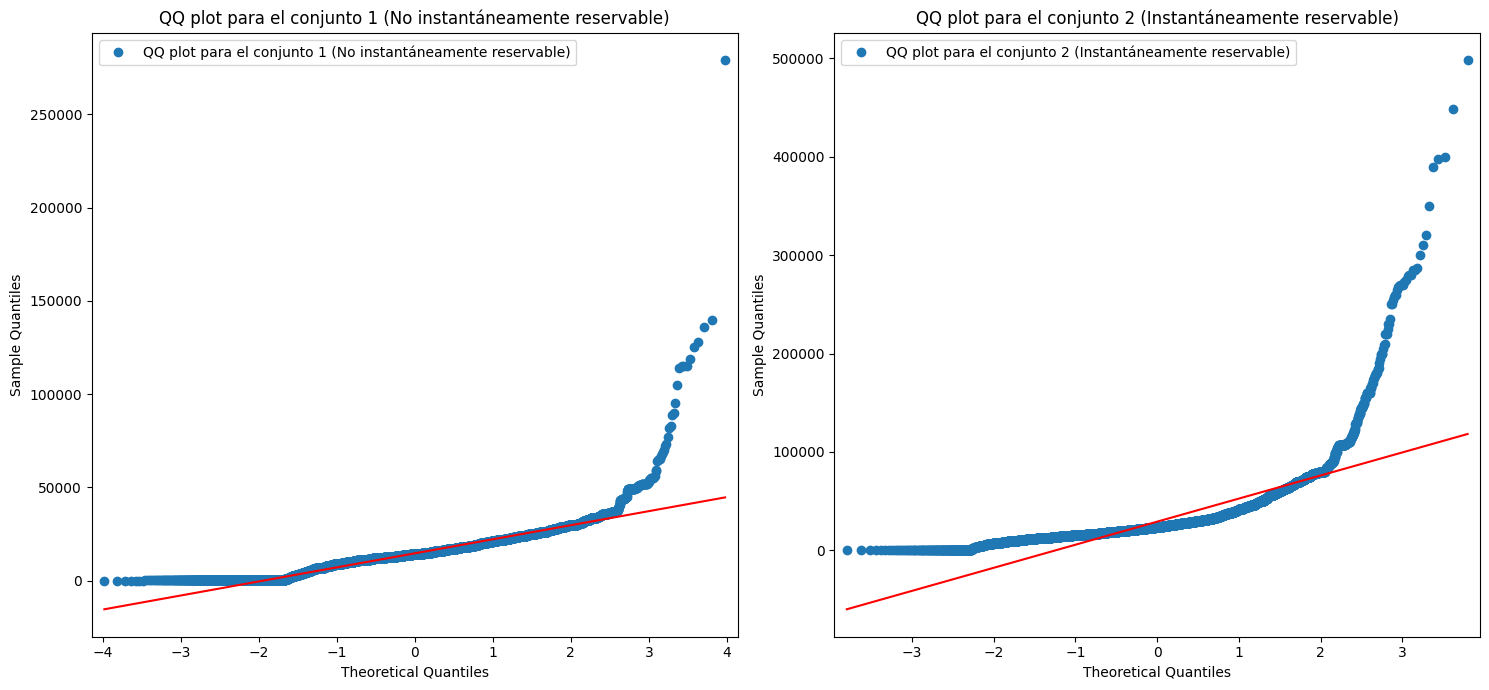

In [137]:
import statsmodels.api as sm

def generar_qqplot(conjunto, titulo, ax):
    sm.qqplot(conjunto, line='s', ax=ax)
    ax.set_title(titulo)
    ax.legend([titulo])

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Generar QQ plots para ambos conjuntos
generar_qqplot(manual, 'QQ plot para el conjunto 1 (No instantáneamente reservable)', axes[0])
generar_qqplot(automatico, 'QQ plot para el conjunto 2 (Instantáneamente reservable)', axes[1])

plt.tight_layout()
plt.show()

Los automaticos se venden a un precio mayor, podriamos sacar esto para buscar los modelos más economicos de automaticos:

C:\Users\spide\AppData\Local\Temp\ipykernel_15212\3481585693.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




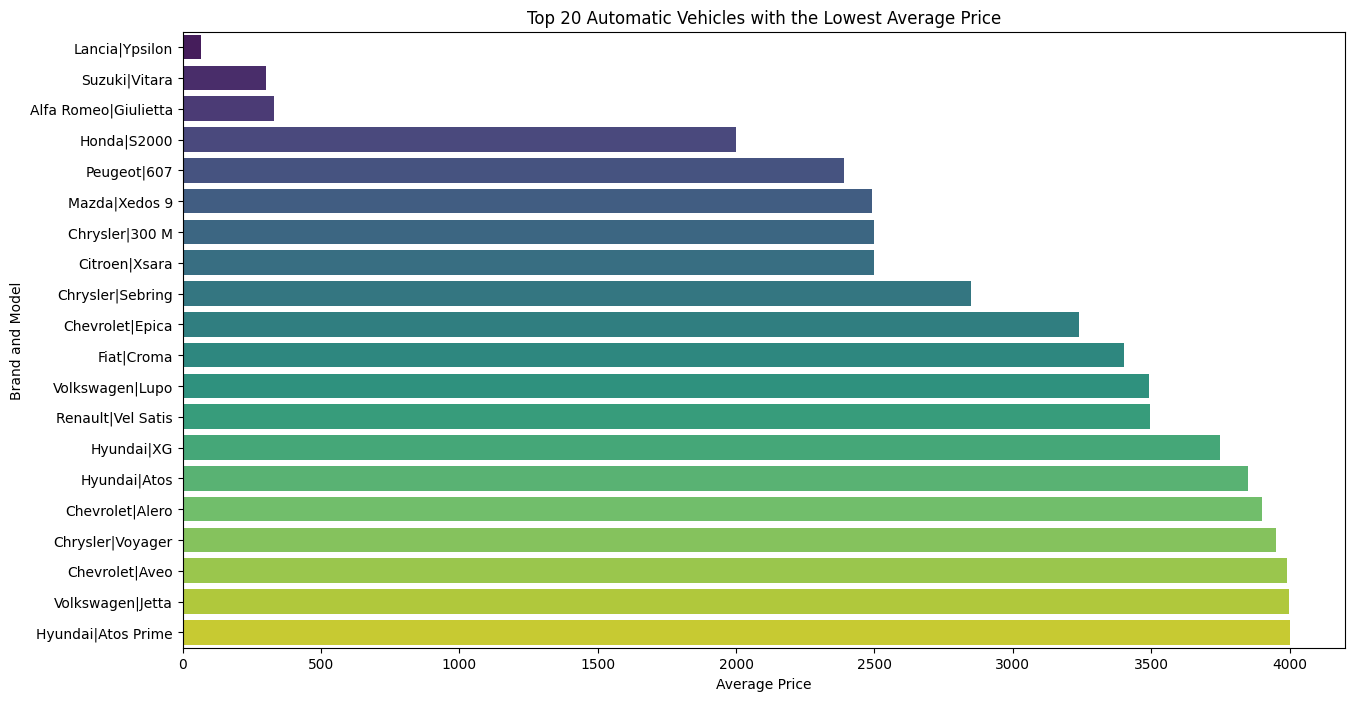

In [138]:
# Filter the dataframe for automatic vehicles
automatic_vehicles = df[df['shift'] == 'automatic']

# Group by brand_model and calculate the mean price
mean_price_automatic = automatic_vehicles.groupby('brand_model')['price'].mean()

# Get the top 20 brand_model with the lowest average price
top_20_automatic = mean_price_automatic.nsmallest(20).reset_index()

# Plot the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=top_20_automatic, x='price', y='brand_model', palette='viridis')
plt.title('Top 20 Automatic Vehicles with the Lowest Average Price')
plt.xlabel('Average Price')
plt.ylabel('Brand and Model')
plt.show()

In [139]:
df.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'brand_model',
       'year_formato_fecha', 'kms_classification', 'power_classification',
       'power_classification_num', 'trend', 'coste_por_unidad_de_potencia'],
      dtype='object')

## <u>**9 - ¿Número de coches por año de fabricación??**</u>

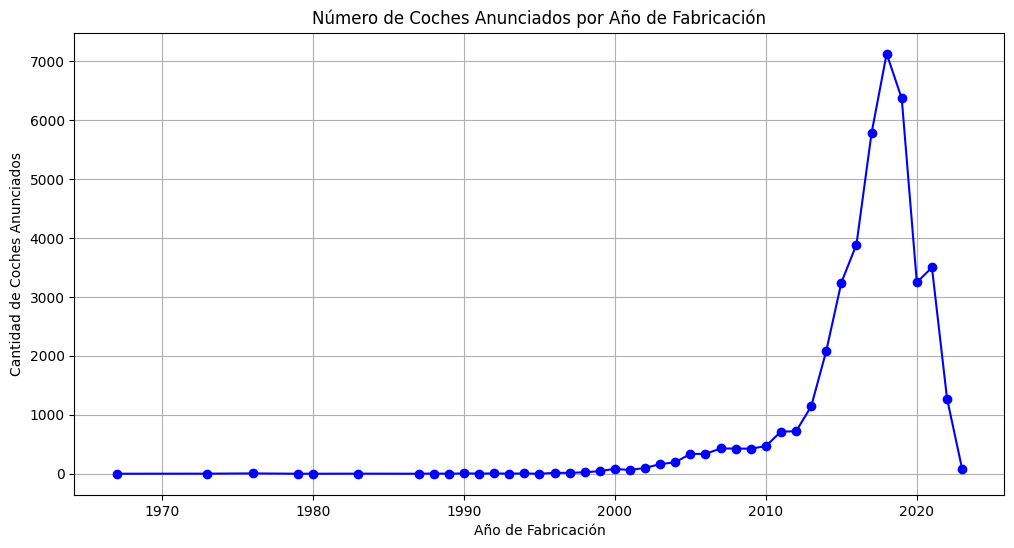

In [5]:
# Contar la cantidad de coches por año de fabricación
year_counts = df['year'].value_counts().sort_index().reset_index()
 
# Renombrar las columnas para mayor claridad
year_counts.columns = ['year', 'count']
 
# Crear el gráfico lineal
plt.figure(figsize=(12, 6))
plt.plot(year_counts['year'], year_counts['count'], marker='o', linestyle='-', color='b')
plt.xlabel('Año de Fabricación')
plt.ylabel('Cantidad de Coches Anunciados')
plt.title('Número de Coches Anunciados por Año de Fabricación')
plt.grid(True)
plt.show()

In [6]:
df.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',
       'state', 'brand_model'],
      dtype='object')

## <u>**10 - ¿Número de modelos por marca?**</u>

In [11]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Cargar el dataset (asegúrate de que "make" y "model" están en tu DataFrame)
# df = pd.read_csv("ruta_a_tu_dataset.csv")  # Descomentar si se carga desde un archivo

# Crear un Dropdown para seleccionar la marca
marcas_disponibles = df["make"].unique()
marca_selector = widgets.Dropdown(
    options=marcas_disponibles,
    description="Marca:",
    style={'description_width': 'initial'}
)

# Función para actualizar el gráfico al cambiar la selección
def actualizar_grafico(marca_seleccionada):
    df_filtrado = df[df["make"] == marca_seleccionada]
    
    # Contar la frecuencia de modelos dentro de la marca
    conteo_modelos = df_filtrado["model"].value_counts().reset_index()
    conteo_modelos.columns = ["Modelo", "Cantidad"]

    # Verificar si hay modelos disponibles para la marca seleccionada
    if conteo_modelos.empty:
        print(f"No hay modelos disponibles para la marca {marca_seleccionada}.")
        return
    
    # Crear gráfico con Plotly Express
    fig = px.bar(
        conteo_modelos,
        x="Modelo",
        y="Cantidad",
        title=f"Distribución de Modelos para {marca_seleccionada}",
        labels={"Cantidad": "Número de Vehículos", "Modelo": "Modelos"},
        text_auto=True
    )
    
    # Rotar etiquetas en eje X si hay demasiados modelos
    fig.update_layout(xaxis_tickangle=-45)
    
    # Mostrar el gráfico
    fig.show()

# Vincular la función al selector de marca
widgets.interactive(actualizar_grafico, marca_seleccionada=marca_selector)


interactive(children=(Dropdown(description='Marca:', options=('Opel', 'Tesla', 'Rover', 'SsangYong', 'MINI', '…

# APARTE

In [1]:
import pandas as pd

In [2]:
dff = pd.read_csv(r'C:\Users\spide\Desktop\Bootcamp\mi_entorno\Modulo_3\proyecto_final_modulo_3\vehiculos-de-segunda-mano-sample.csv',encoding = 'UTF-8')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_scoredf[df[dfdf# ##sadadnfmlansfefd]]
from sklearn.neighbors import KNeighborsRegressor

# Cargar el DataFrame
dff = pd.read_csv(r'C:\Users\spide\Desktop\Bootcamp\mi_entorno\Modulo_3\proyecto_final_modulo_3\vehiculos-de-segunda-mano-sample.csv', encoding='UTF-8')

columns_to_use = ['make', 'location', 'model', 'version', 'power', 'dealer_name', 'fuel', 'kms', 'shift']
columns_to_predict = ['version', 'power', 'dealer_name', 'fuel', 'kms', 'shift']

batch_size = 1000  # Tamaño del lote

for column in columns_to_predict:
    # Paso 2: Crear un DataFrame con las columnas seleccionadas 
    df_knn = dff[columns_to_use].copy()

    # Paso 3: Encodear las variables categóricas en un nuevo dataframe
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_vars = encoder.fit_transform(df_knn[['make', 'location', 'model', 'version', 'dealer_name', 'fuel', 'shift']])

    # Crear un DataFrame con las columnas codificadas
    encoded_vars_df = pd.DataFrame(
        encoded_vars,
        columns=encoder.get_feature_names_out(['make', 'location', 'model', 'version', 'dealer_name', 'fuel', 'shift'])
    )

    # Paso 4: Concatenar encoded_vars_df con df_knn
    df_knn = df_knn.reset_index(drop=True)
    encoded_vars_df = encoded_vars_df.reset_index(drop=True)
    
    # Mantener la columna actual sin codificar
    columns_to_drop = [col for col in ['make', 'location', 'model', 'version', 'dealer_name', 'fuel', 'shift'] if col != column]
    df_knn_encoded = pd.concat([df_knn.drop(columns=columns_to_drop), encoded_vars_df], axis=1)

    # Paso 5: Dividir el dataframe en variables de entrenamiento y variables de prueba
    train_data = df_knn_encoded[df_knn_encoded[column].notnull()]
    test_data = df_knn_encoded[df_knn_encoded[column].isnull()]

    # Filtrar filas sin valores nulos en las características
    train_data = train_data.dropna()

    # Procesar los datos en lotes
    for start in range(0, len(train_data), batch_size):
        end = start + batch_size
        batch_train_data = train_data.iloc[start:end]

        # Separar las características (X) y variables objetivos (Y)
        X_train = batch_train_data.drop(columns=[column])
        y_train = batch_train_data[column]
        X_test = test_data.drop(columns=[column])

        # Asegurarse de que todas las características sean numéricas
        X_train = X_train.apply(pd.to_numeric, errors='coerce')
        X_test = X_test.apply(pd.to_numeric, errors='coerce')

        # Escalar las características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Paso 6: Encontrar el mejor valor de k
        k_range = range(1, 11)
        k_errors = []

        for k in k_range:
            knn = KNeighborsRegressor(n_neighbors=k)
            mse = -cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()
            k_errors.append(mse)

        # Graficar los resultados
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, k_errors, marker='o')
        plt.title(f'Regla del Codo para encontrar el mejor valor de k de la columna {column}')
        plt.xlabel('Número de vecinos (k)')
        plt.ylabel('Error Cuadrático Medio (MSE)')
        plt.xticks(k_range)
        plt.grid(True)
        plt.show()

        # Definir el mejor valor de k
        best_k = int(input('Ingrese el mejor valor de k: '))

        # Paso 7: Entrenar el modelo con el mejor valor de k
        knn_model = KNeighborsRegressor(n_neighbors=best_k)
        knn_model.fit(X_train_scaled, y_train)

        # Paso 8: Predecir los valores faltantes
        predicted_column = knn_model.predict(X_test_scaled)
        predicted_column = predicted_column.astype(int)

        # Paso 9: Reemplazar los valores faltantes en el dataframe original
        df_knn.loc[df_knn[column].isnull(), column] = predicted_column

MemoryError: Unable to allocate 8.70 GiB for an array with shape (11829, 98768) and data type float64

In [19]:
df.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',
       'state', 'brand_model'],
      dtype='object')